In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [393]:
# scroll down to "CLEAN" section - before that messy preliminary code

In [2]:
ls

ERK1_74N.pdb*    ERK_rmsfs.ipynb  rmsfs2.npy
ERK1_WT.pdb*     rmsfs1.npy       rsmfs_run0.npy


In [3]:
rmsfs0 = np.load('rsmfs_run0.npy')

In [4]:
rmsfs0.shape

(982, 2873)

In [5]:
# ok so we gotta calculate them per residue

In [6]:
top = md.load('ERK1_WT.pdb')

In [7]:
top = top.atom_slice(top.top.select('not element H'))

In [8]:
top

<mdtraj.Trajectory with 1 frames, 2869 atoms, 352 residues, without unitcells at 0x613d74668>

In [9]:
# remember the rmsfs also have sodiums - they will be last, ignore those

In [10]:
len(list(top.top.residues))

352

In [11]:
len(list(top.top.residue(0).atoms))

7

In [12]:
rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [13]:
np.array(rmsfs0_res).shape

(982, 352)

In [55]:
rmsfs0_res_mean = np.mean(rmsfs0_res, axis=0)

In [663]:
# plt.figure()
# plt.plot(rmsfs0_res_mean*10)
# plt.ylim((0,5))

In [14]:
import seaborn as sns
sns.set_style('ticks')

In [93]:
x = []
y = []

for i in range(len(rmsfs0_res)):
    for j in range(len(rmsfs0_res[i])):
        x.append(j)
        y.append(rmsfs0_res[i][j]*10)

In [31]:
sns.set_context("notebook", rc={"lines.linewidth": 0.5})

In [662]:
# plt.figure(dpi=300)
# ax = sns.pointplot(x=x, y=y, markers='', errwidth=2)
# plt.ylim((0,5))
# plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
# plt.xlabel('Residue index')
# plt.ylabel('RMSF (A)')
# plt.title('ERK1 WT')
# plt.show()

In [114]:
# ok now run1 (ERK1_74N)

In [17]:
rmsfs1 = np.load('rmsfs1.npy')

In [18]:
rmsfs1.shape

(983, 2881)

In [19]:
top = md.load('ERK1_74N.pdb')

In [20]:
top = top.atom_slice(top.top.select('not element H'))

In [21]:
top

<mdtraj.Trajectory with 1 frames, 2877 atoms, 353 residues, without unitcells at 0x1a165afac8>

In [22]:
rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [24]:
np.array(rmsfs0_res).shape

(982, 352)

In [23]:
np.array(rmsfs1_res).shape

(983, 353)

In [25]:
x0 = []
y0 = []

for i in range(len(rmsfs0_res)):
    for j in range(len(rmsfs0_res[i])):
        x0.append(j)
        y0.append(rmsfs0_res[i][j]*10)

In [26]:
x1 = []
y1 = []

for i in range(len(rmsfs1_res)):
    for j in range(len(rmsfs1_res[i])):
        if j == 51:
            continue
        if j > 51:
            x1.append(j-1)
            y1.append(rmsfs1_res[i][j]*10)
        else:
            x1.append(j)
            y1.append(rmsfs1_res[i][j]*10)

In [27]:
len(set(x0))

352

In [28]:
len(set(x1))

352

In [29]:
# the mutation is res 51 (0 indexed)

In [664]:
# plt.figure(dpi=300)
# sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
# sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
# sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(rmsfs1_res, axis=0)[:51], np.mean(rmsfs1_res, axis=0)[52:]])-np.mean(rmsfs0_res, axis=0))*10, markers='', errwidth=2, color='red', label='74N-WT diff.')
# plt.ylim((-2,5))
# plt.xticks(np.arange(0,len(rmsfs1_res[0]),50), np.arange(0,len(rmsfs1_res[0]),50))
# plt.xlabel('Residue index')
# plt.ylabel('RMSF (A)')
# plt.title('ERK1')
# plt.show()

In [49]:
# so we're definitely not reproducing what they saw - question is can I see other things if I just pick small groups
# of trajectories

# I wanna get the most extreme differences between the two - so for each residue, find the maximum and minimum
# and plot those

In [53]:
np.array(rmsfs0_res).shape

(982, 352)

In [54]:
max0 = []
min0 = []

max1 = []
min1 = []

for i in range(352):
    max0.append(np.max(np.array(rmsfs0_res)[:,i]))
    min0.append(np.min(np.array(rmsfs0_res)[:,i]))
    
    max1.append(np.max(np.array(rmsfs1_res)[:,i]))
    min1.append(np.min(np.array(rmsfs1_res)[:,i]))

In [665]:
# plt.figure(dpi=100)
# plt.plot(max0)
# plt.plot(min0)
# plt.show()

In [666]:
# plt.figure(dpi=100)
# plt.plot(max1)
# plt.plot(min1)
# plt.show()

In [66]:
# let's see differences between the most flexible ones - but it seems like we have a problem
# need to filter some trajectories out - I suspect there are a lot of very short trajectories 
# causing trouble - let's see if we can find and remove them

In [667]:
# plt.figure(dpi=100)
# plt.plot(np.array(max1) - np.array(max0))
# plt.show()

In [70]:
# let's see difference between *the longest* trajectories too

In [73]:
# ok we don't have trajectory lengths - so let's look at the average overall RMSD for each trajectory
# see if anything obvious there - then I'll get traj lengths from lilac

In [77]:
traj_means_0 = [np.mean(x) for x in rmsfs0_res]

In [78]:
traj_means_1 = [np.mean(x) for x in rmsfs1_res]

In [668]:
# sns.distplot(traj_means_0)

In [82]:
traj_sd_0 = [np.std(x) for x in rmsfs0_res]

In [83]:
traj_sd_1 = [np.std(x) for x in rmsfs1_res]

In [669]:
# sns.distplot(traj_sd_0)

In [85]:
# how many RMSFs in a trajectory are below a certain threshold

In [93]:
np.sum(np.array(rmsfs0_res[0]) < 0.1)

86

In [670]:
# plt.plot(rmsfs0_res[0])

In [99]:
def less_then(cutoff, traj):
    return np.sum(np.array(rmsfs0_res[traj]) < cutoff)

In [671]:
# plt.plot([less_then(0.1, i) for i in range(len(rmsfs0_res))])

In [105]:
np.argmin([less_then(0.1, i) for i in range(len(rmsfs0_res))])

196

In [108]:
np.argmax([less_then(0.1, i) for i in range(len(rmsfs0_res))])

885

In [672]:
# plt.figure(dpi=150)
# plt.plot(rmsfs0_res[196])
# plt.plot(rmsfs0_res[885])

In [113]:
# ok so yeah this is good to show trajectories can be very different - let's look at traj lengths on lilac

In [143]:
traj_lengths = np.load('traj_lengths.npy')

In [144]:
traj_lengths = traj_lengths[10:]

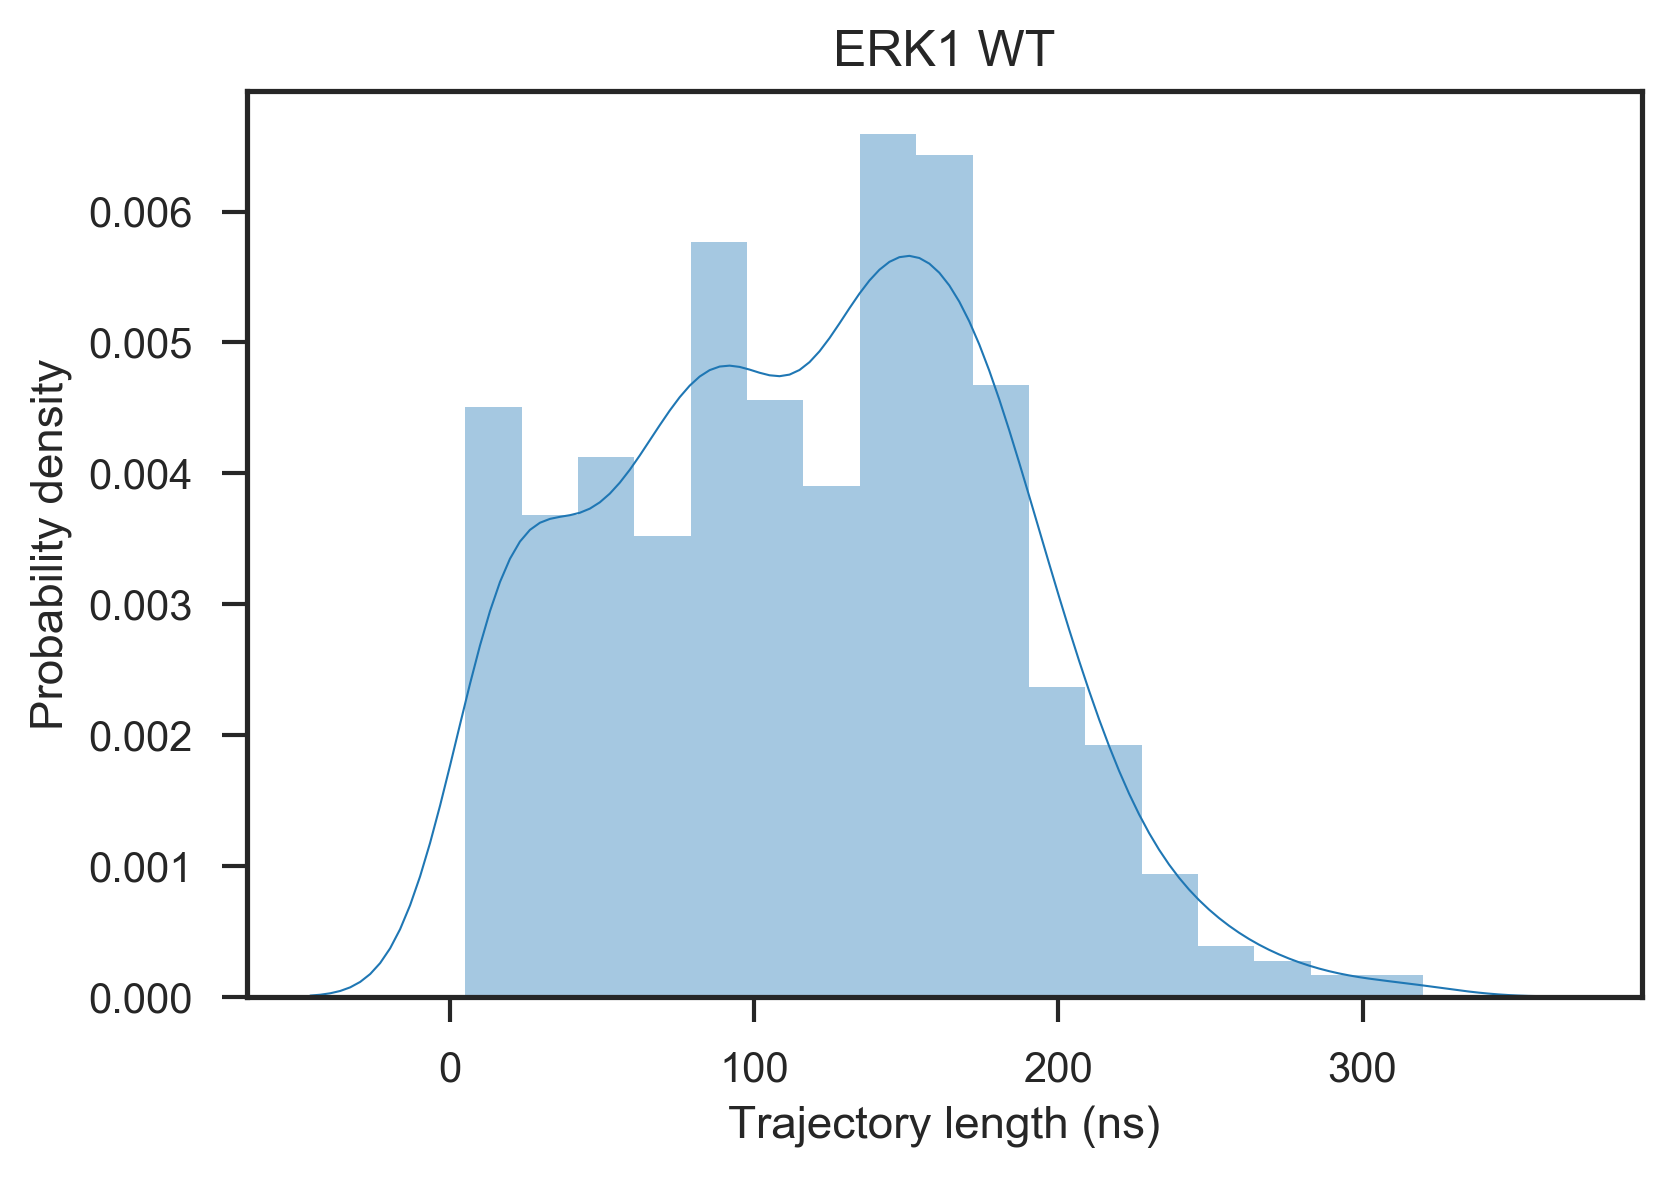

In [469]:
plt.figure(dpi=300)
sns.distplot(np.array(traj_lengths[0])/2)
plt.xlabel('Trajectory length (ns)')
plt.ylabel('Probability density')
plt.title('ERK1 WT')
plt.show()

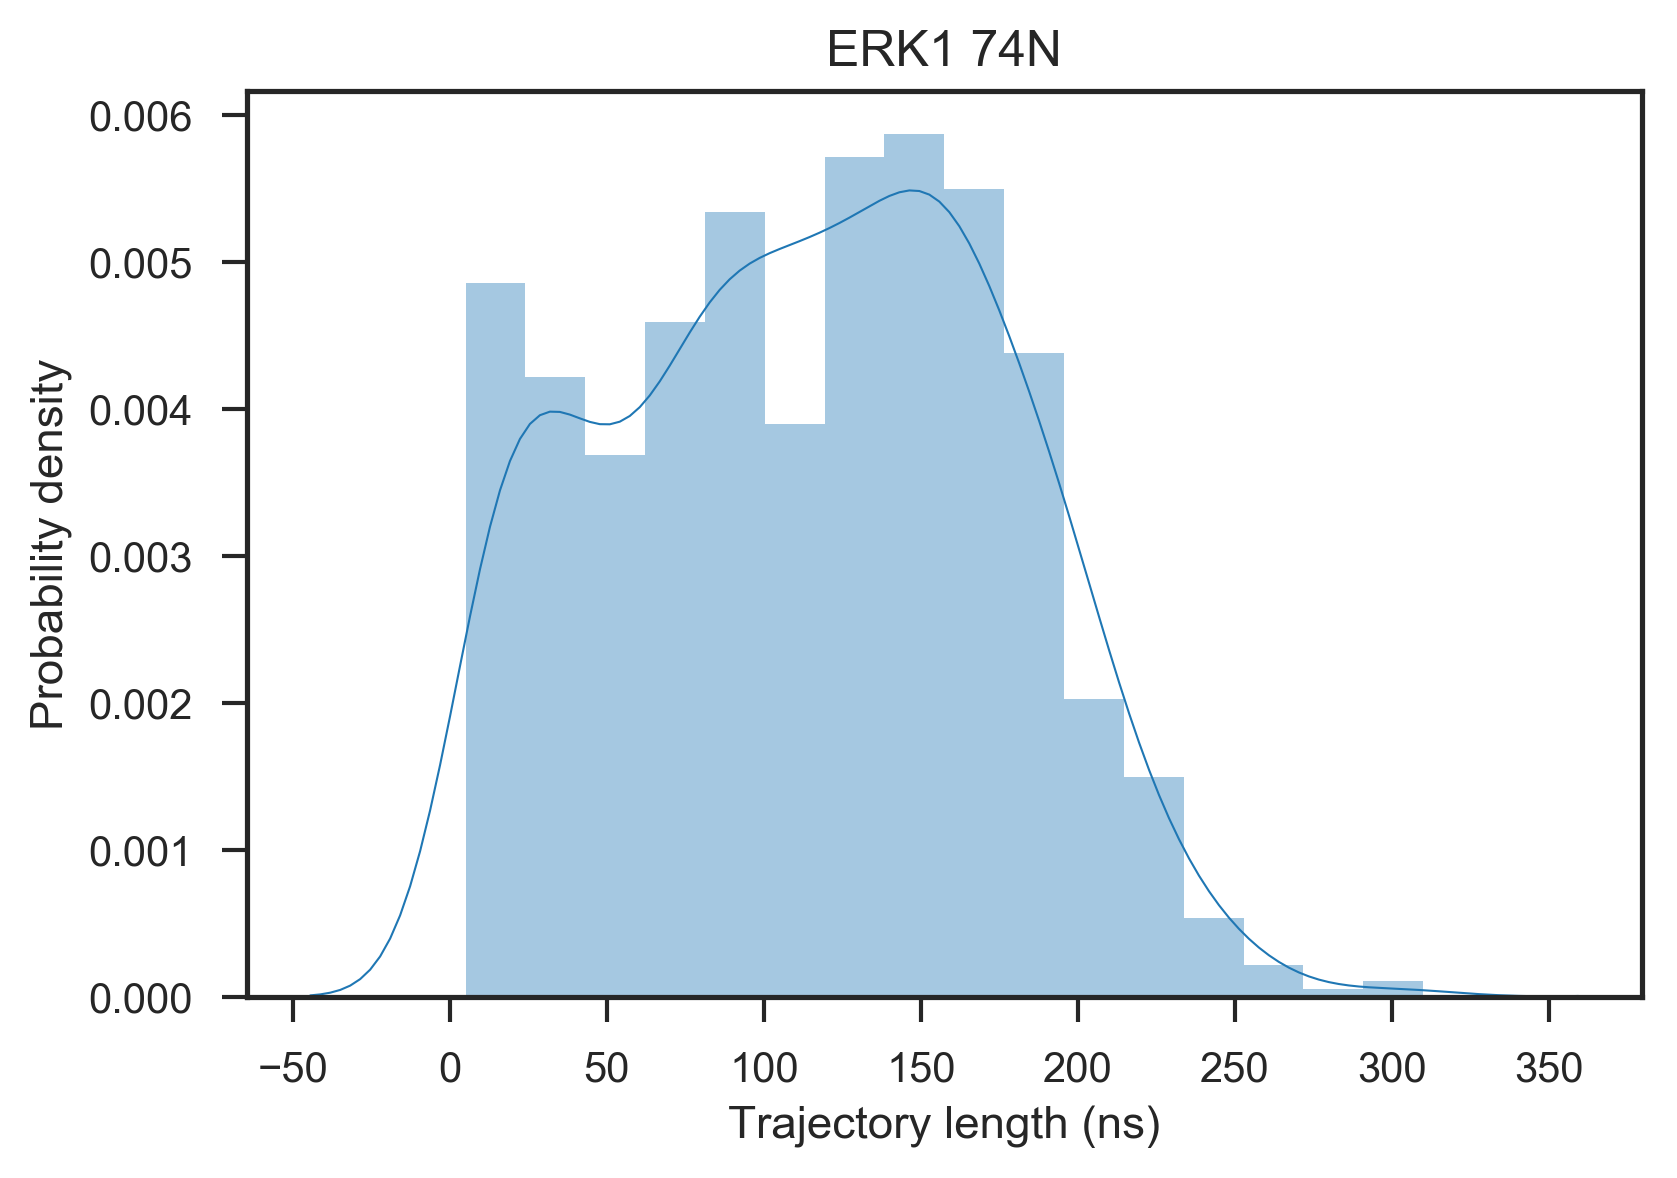

In [470]:
plt.figure(dpi=300)
sns.distplot(np.array(traj_lengths[1])/2)
plt.xlabel('Trajectory length (ns)')
plt.ylabel('Probability density')
plt.title('ERK1 74N')
plt.show()

In [161]:
np.argmax(traj_lengths[0]), np.argmax(traj_lengths[1])

(763, 229)

In [164]:
np.max(traj_lengths[0]) / 2, np.max(traj_lengths[1]) / 2 # ns

(320.0, 310.0)

In [175]:
rmsfs0_res[0]

[0.83449465,
 0.73938608,
 0.56512022,
 0.52803016,
 0.39354745,
 0.32623944,
 0.34565884,
 0.28182864,
 0.35146415,
 0.38545981,
 0.37103364,
 0.3185083,
 0.21770224,
 0.26850122,
 0.19461043,
 0.2592991,
 0.28677633,
 0.21928802,
 0.1628937,
 0.23214638,
 0.265306,
 0.24318594,
 0.28217083,
 0.25572193,
 0.23011036,
 0.27654076,
 0.41332537,
 0.36315477,
 0.43270475,
 0.42335296,
 0.19618626,
 0.23120832,
 0.19052508,
 0.15946324,
 0.16450395,
 0.14377847,
 0.19733064,
 0.18329528,
 0.31867236,
 0.26281175,
 0.2352187,
 0.28916892,
 0.19095962,
 0.2008114,
 0.12054031,
 0.10617298,
 0.11370242,
 0.13656226,
 0.14609797,
 0.13861649,
 0.1450458,
 0.13428968,
 0.14367017,
 0.24212439,
 0.21082744,
 0.17421992,
 0.17439501,
 0.16443272,
 0.12021332,
 0.15603676,
 0.21082926,
 0.11455546,
 0.09201254,
 0.11663051,
 0.12798327,
 0.096967183,
 0.096693747,
 0.11217239,
 0.10201696,
 0.11123134,
 0.13272865,
 0.16744202,
 0.24972625,
 0.14097317,
 0.15965453,
 0.10162251,
 0.10345632,
 0.13

In [159]:
# so let's see the RMSF differences of the longest trajectories

In [673]:
# index0 = 763
# index1 = 229

# plt.figure(dpi=200)
# sns.pointplot(x=np.arange(352), y=np.array(rmsfs0_res)[index0]*10, markers='', errwidth=2, color='green', label='WT')
# sns.pointplot(x=np.arange(352), y=(np.concatenate([rmsfs1_res[index1][:51], rmsfs1_res[index1][52:]]))*10, markers='', errwidth=2, color='blue', label='74N')
# sns.pointplot(x=np.arange(352), y=(np.concatenate([rmsfs1_res[index1][:51], rmsfs1_res[index1][52:]])-np.array(rmsfs0_res[index0]))*10, markers='', errwidth=2, color='red', label='74N-WT diff.')
# plt.ylim((-2,5))
# plt.xticks(np.arange(0,len(rmsfs1_res[0]),50), np.arange(0,len(rmsfs1_res[0]),50))
# plt.xlabel('Residue index')
# plt.ylabel('RMSF (A)')
# plt.title('ERK1')
# plt.show()

In [182]:
# now include more and more trajectories

In [195]:
len(rmsfs0_res[0])

352

In [196]:
# rmsfs0_res_ = rmsfs0_res
# rmsfs1_res_ = rmsfs1_res

In [251]:
cut = 600

len(np.argwhere(np.array(traj_lengths[0]) > cut)), len(np.argwhere(np.array(traj_lengths[1]) > cut))

(3, 1)

In [238]:
rmsfs0_res = np.array(rmsfs0_res_)[np.argwhere(np.array(traj_lengths[0]) > 300)]
rmsfs1_res = np.array(rmsfs1_res_)[np.argwhere(np.array(traj_lengths[1]) > 300)]


x0 = []
y0 = []

for i in range(len(rmsfs0_res)):
    for j in range(len(rmsfs0_res[i][0])):
        x0.append(j)
        y0.append(rmsfs0_res[i][0][j]*10)
        
x1 = []
y1 = []

for i in range(len(rmsfs1_res)):
    for j in range(len(rmsfs1_res[i][0])):
        if j == 51:
            continue
        if j > 51:
            x1.append(j-1)
            y1.append(rmsfs1_res[i][0][j]*10)
        else:
            x1.append(j)
            y1.append(rmsfs1_res[i][0][j]*10)        

In [674]:
# plt.figure(dpi=300)
# sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
# sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
# sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(rmsfs1_res, axis=0)[0][:51], np.mean(rmsfs1_res, axis=0)[0][52:]])-np.mean(rmsfs0_res, axis=0)[0])*10, markers='', errwidth=2, color='red', label='74N-WT diff.')
# plt.ylim((-2,5))
# plt.xticks(np.arange(0,len(rmsfs1_res_[0]),50), np.arange(0,len(rmsfs1_res_[0]),50))
# plt.xlabel('Residue index')
# plt.ylabel('RMSF (A)')
# plt.title('ERK1')
# plt.show()

In [240]:
# so this is very interesting - let's make these plots at a series of cutoffs, and make a movie!

In [241]:
mkdir erk1_rmsf_pngs

In [675]:
# for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
    
#     rmsfs0_res = np.array(rmsfs0_res_)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
#     rmsfs1_res = np.array(rmsfs1_res_)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]


#     x0 = []
#     y0 = []

#     for i in range(len(rmsfs0_res)):
#         for j in range(len(rmsfs0_res[i][0])):
#             x0.append(j)
#             y0.append(rmsfs0_res[i][0][j]*10)

#     x1 = []
#     y1 = []

#     for i in range(len(rmsfs1_res)):
#         for j in range(len(rmsfs1_res[i][0])):
#             if j == 51:
#                 continue
#             if j > 51:
#                 x1.append(j-1)
#                 y1.append(rmsfs1_res[i][0][j]*10)
#             else:
#                 x1.append(j)
#                 y1.append(rmsfs1_res[i][0][j]*10)            

#     plt.figure(dpi=300)
#     sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
#     sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
#     sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(rmsfs1_res, axis=0)[0][:51], np.mean(rmsfs1_res, axis=0)[0][52:]])-np.mean(rmsfs0_res, axis=0)[0])*10, markers='', errwidth=2, color='red', label='74N-WT diff.')
#     plt.ylim((-2,5))
#     plt.xticks(np.arange(0,len(rmsfs1_res_[0]),50), np.arange(0,len(rmsfs1_res_[0]),50))
#     plt.xlabel('Residue index')
#     plt.ylabel('RMSF (A)')
#     plt.title('ERK1 - longer than %d ns' % (cutoff/2))
#     plt.tight_layout()
#     plt.savefig('erk1_rmsf_pngs/%d.png' % k)

In [258]:
import moviepy.editor as mpy
from glob import glob

In [268]:
im = mpy.ImageSequenceClip(sorted(glob('erk1_rmsf_pngs/*.png')), fps=1)

In [269]:
im.write_videofile('erk1.mp4')

[MoviePy] >>>> Building video test.mp4
[MoviePy] Writing video test.mp4


 89%|████████▉ | 8/9 [00:00<00:00, 12.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test.mp4 



In [271]:
# ok so this is looking good - let's do this for the 3 pairs of ERK2 now

In [ ]:
# actually let's repeat ERK1 for clarity

In [ ]:
############### CLEAN #############

In [378]:
#### ERK1

In [383]:
# mv rsmfs_run0.npy rmsfs0.npy

In [ ]:
# # all the following code here in one cell for copying

# rmsfs0 = np.load('rmsfs0.npy')
# top = md.load('ERK1_WT.pdb')
# top = top.atom_slice(top.top.select('not element H'))

# rmsfs = rmsfs0
# rmsfs0_res = []
# rmsfs_res = rmsfs0_res

# for traj_no in range(len(rmsfs)):

#     rmsfs_res_ = []

#     i = 0

#     for residue in list(top.top.residues):
#         no_atoms = len(list(residue.atoms))
#         rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
#         i += no_atoms
    
#     rmsfs_res.append(rmsfs_res_)
    
# rmsfs1 = np.load('rmsfs1.npy')
# top = md.load('ERK1_74N.pdb')
# top = top.atom_slice(top.top.select('not element H')) 

# rmsfs = rmsfs1
# rmsfs1_res = []
# rmsfs_res = rmsfs1_res

# for traj_no in range(len(rmsfs)):

#     rmsfs_res_ = []

#     i = 0

#     for residue in list(top.top.residues):
#         no_atoms = len(list(residue.atoms))
#         rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
#         i += no_atoms
    
#     rmsfs_res.append(rmsfs_res_)
    
# traj_lengths = np.load('traj_lengths.npy')
# traj_lengths = traj_lengths[10:]

# for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
# #for k, cutoff in enumerate([550]):
# #for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
#     a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
#     b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

#     x0 = []
#     y0 = []

#     for i in range(len(a)):
#         for j in range(len(a[i][0])):
#             x0.append(j)
#             y0.append(a[i][0][j]*10)

#     x1 = []
#     y1 = []

#     for i in range(len(b)):
#         for j in range(len(b[i][0])):
#             if j == 51:
#                 continue
#             if j > 51:
#                 x1.append(j-1)
#                 y1.append(b[i][0][j]*10)
#             else:
#                 x1.append(j)
#                 y1.append(b[i][0][j]*10)            

#     plt.figure(dpi=300)
#     sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
#     sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
#     sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
#     plt.ylim((-2,5))
#     plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
#     plt.xlabel('Residue index')
#     plt.ylabel('RMSF (A)')
#     plt.title('ERK1 74 N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
#     plt.tight_layout()
#     plt.savefig('erk1_rmsf_pngs/%d.png' % k)
#     plt.close()

In [384]:
rmsfs0 = np.load('rmsfs0.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('not element H'))

In [385]:
top

<mdtraj.Trajectory with 1 frames, 2869 atoms, 352 residues, without unitcells at 0x1a2cfb4780>

In [386]:
rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [388]:
rmsfs1 = np.load('rmsfs1.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('not element H'))

In [389]:
top

<mdtraj.Trajectory with 1 frames, 2877 atoms, 353 residues, without unitcells at 0x1a2c32e1d0>

In [390]:
rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [391]:
traj_lengths = np.load('traj_lengths.npy')
traj_lengths = traj_lengths[10:]

In [ ]:
# mutant is 0-index 51

In [392]:
# mkdir erk1_rmsf_pngs

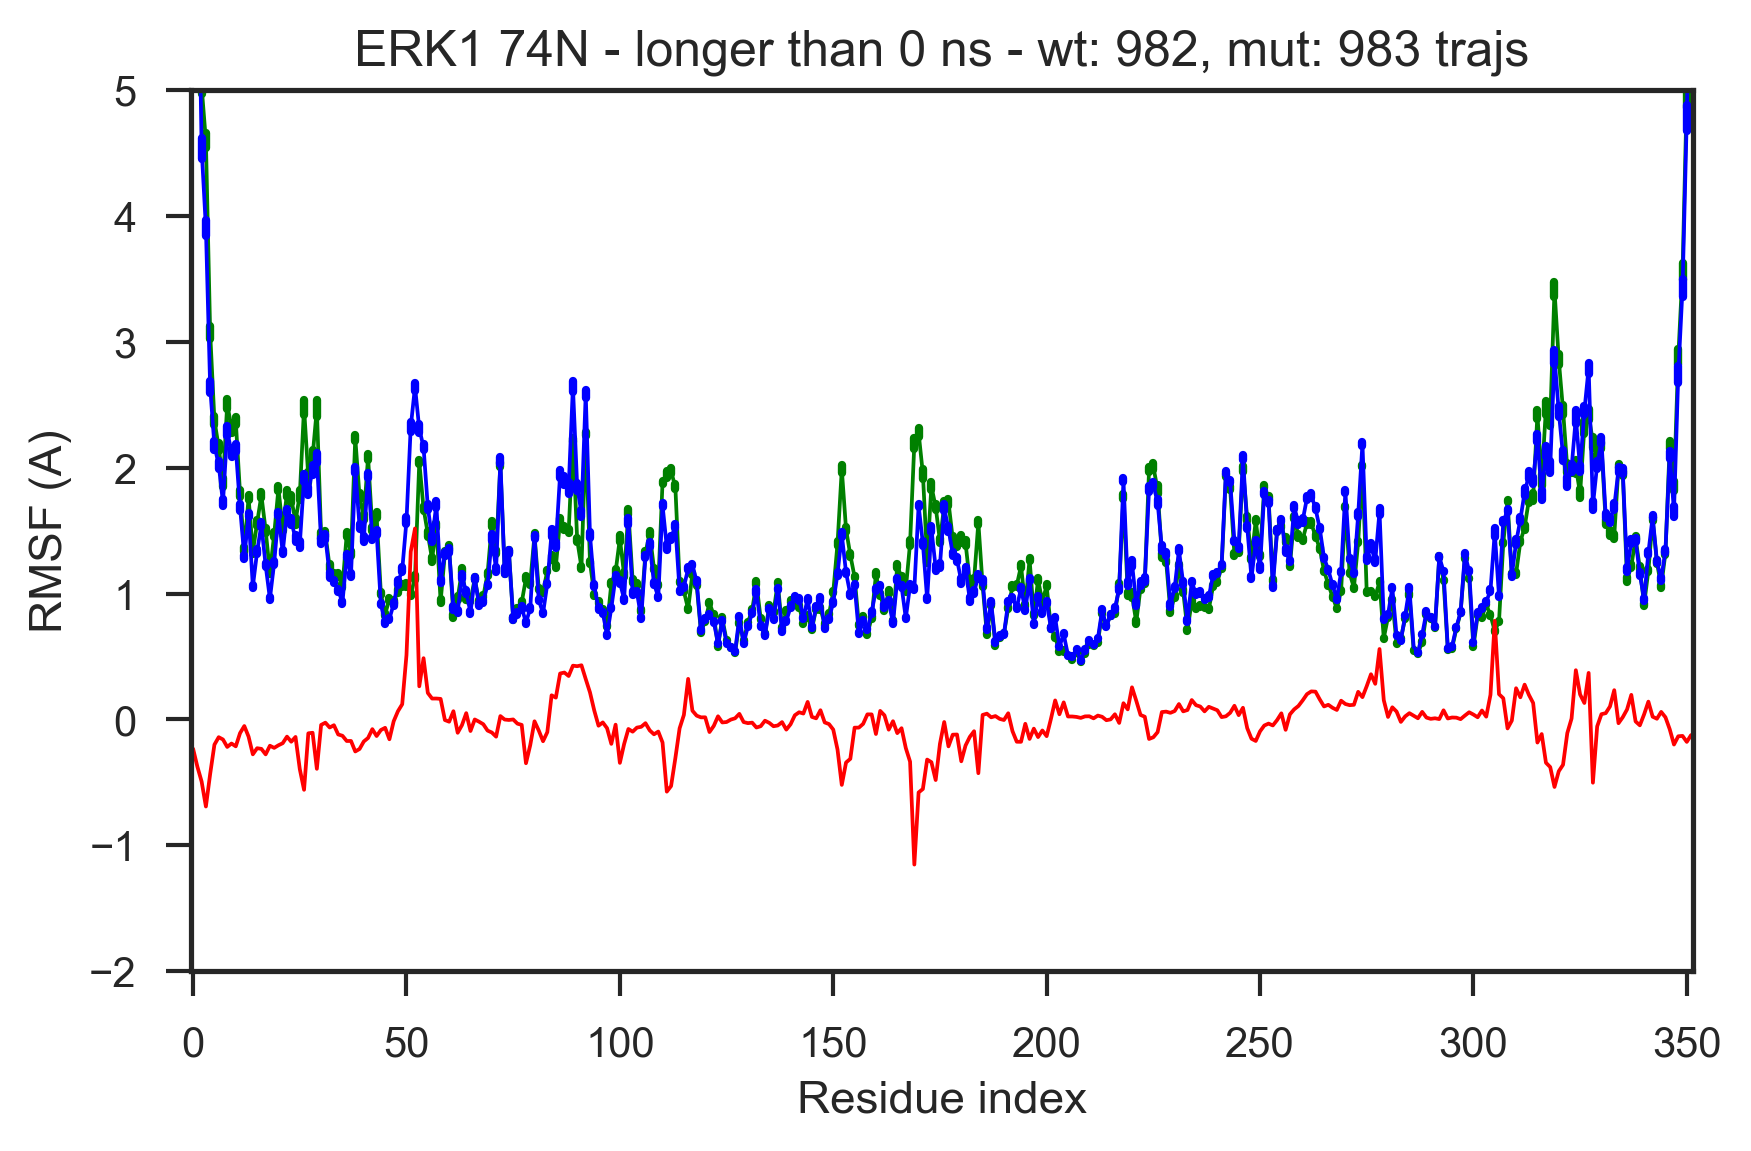

In [421]:
#for k, cutoff in enumerate([0,50,100,200,300,400,500, 600]):
#for k, cutoff in enumerate([550]):
for k, cutoff in enumerate([0]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK1 74N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.tight_layout()
    #plt.savefig('erk1_rmsf_pngs/%d.png' % k)
    plt.show()

In [424]:
for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
#for k, cutoff in enumerate([550]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK1 74 N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.tight_layout()
    plt.savefig('erk1_rmsf_pngs/%d.png' % k)
    plt.close()

In [425]:
im = mpy.ImageSequenceClip(sorted(glob('erk1_rmsf_pngs/*.png')), fps=1)

In [426]:
im.write_videofile('erk1.mp4')

[MoviePy] >>>> Building video erk1.mp4
[MoviePy] Writing video erk1.mp4


 89%|████████▉ | 8/9 [00:00<00:00, 12.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk1.mp4 



In [272]:
####### ERK2

In [ ]:
# WT

In [357]:
rmsfs2 = np.load('rmsfs2.npy')
top = md.load('ERK2_WT.pdb')
top = top.atom_slice(top.top.select('not element H'))

In [358]:
top

<mdtraj.Trajectory with 1 frames, 2899 atoms, 357 residues, without unitcells at 0x1a17fdd160>

In [351]:
rmsfs = rmsfs2
rmsfs2_res = []
rmsfs_res = rmsfs2_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [ ]:
# 55N

In [352]:
rmsfs3 = np.load('rmsfs3.npy')
top = md.load('ERK2_55N.pdb')
top = top.atom_slice(top.top.select('not element H'))

In [353]:
rmsfs = rmsfs3
rmsfs3_res = []
rmsfs_res = rmsfs3_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [344]:
traj_lengths = np.load('traj_lengths.npy')
traj_lengths = traj_lengths[10:]

In [ ]:
# mutant is 0-index 54

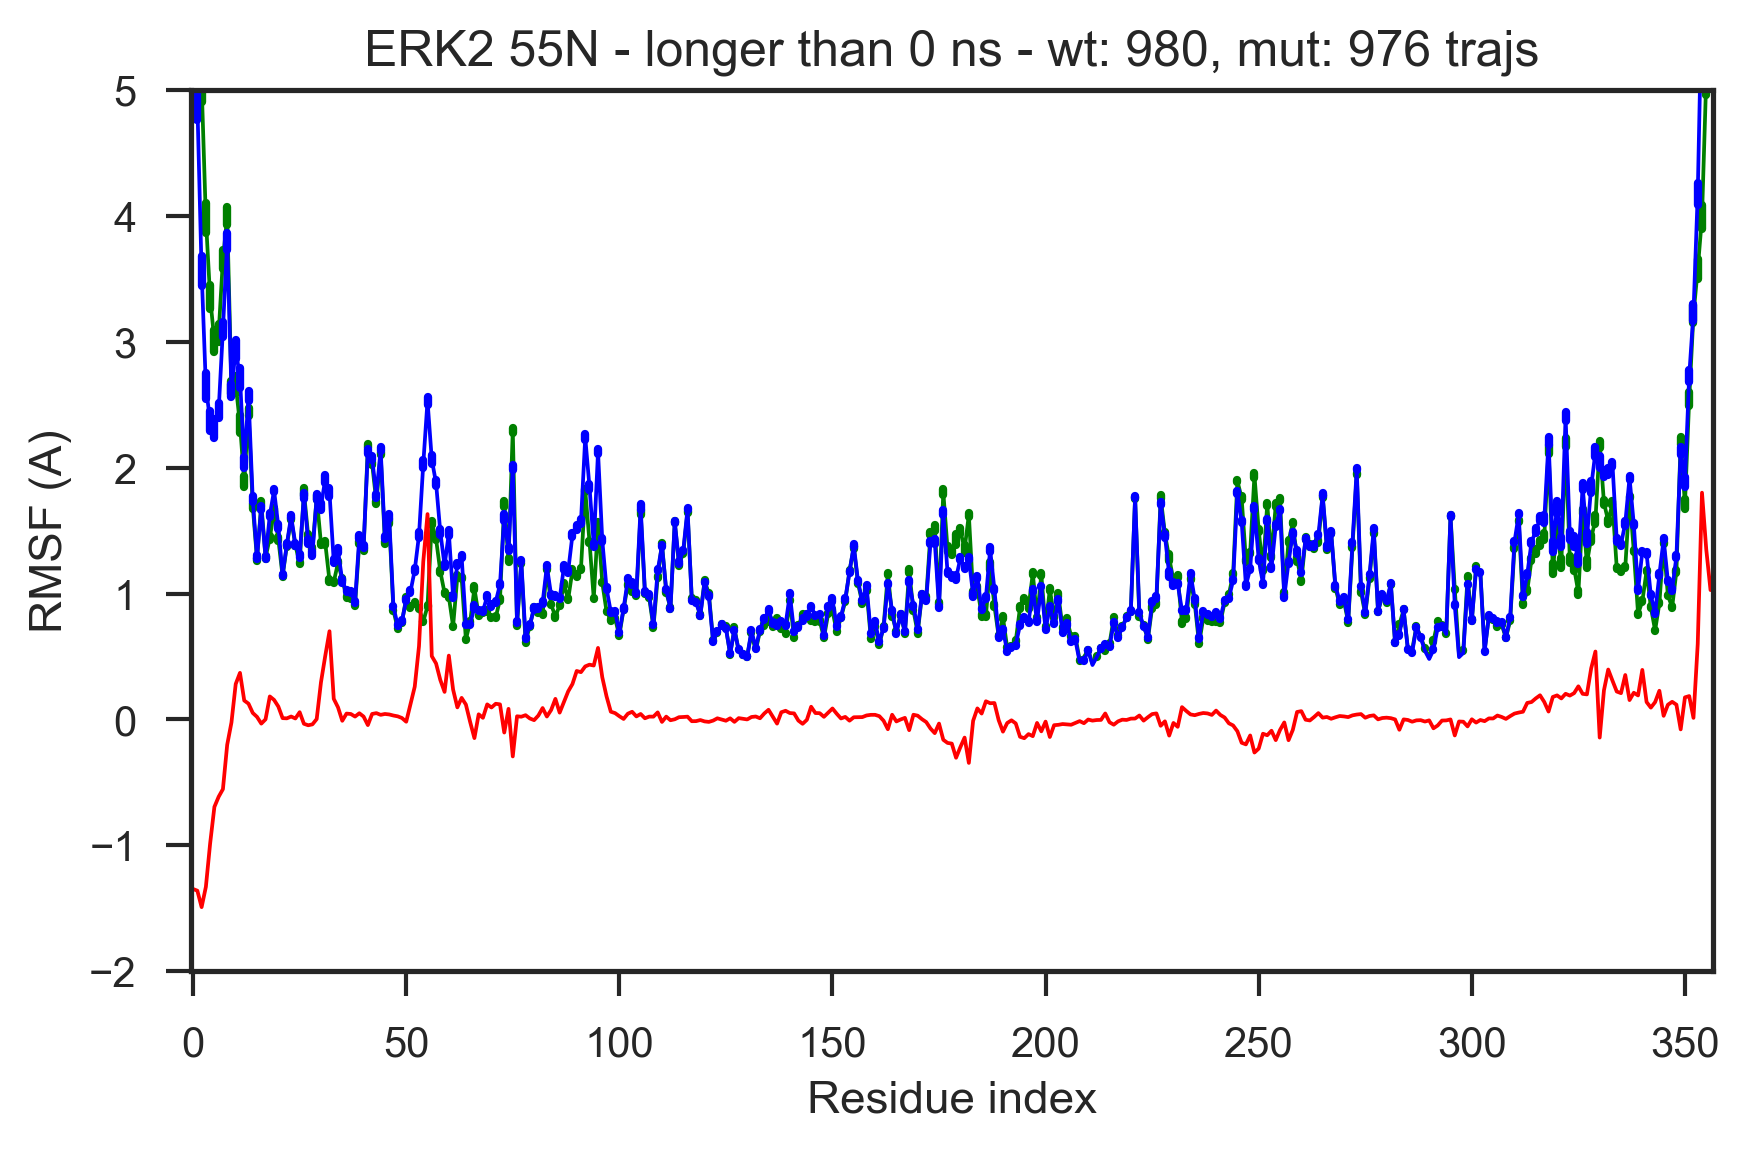

In [413]:
#for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
for k, cutoff in enumerate([0]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs3_res)[np.argwhere(np.array(traj_lengths[3]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 54:
                continue
            if j > 54:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][55:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK2 55N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[3]) > cutoff))))
    plt.tight_layout()
    #plt.savefig('erk1_rmsf_pngs/%d.png' % k)

In [370]:
# mkdir erk2_55n_rmsf_pngs

In [410]:
#for k, cutoff in enumerate([0,50,100,200,300,400,500, 600]):
#for k, cutoff in enumerate([550]):
for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs3_res)[np.argwhere(np.array(traj_lengths[3]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 54:
                continue
            if j > 54:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][55:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK2 55N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[3]) > cutoff))))
    plt.tight_layout()
    plt.savefig('erk2_55n_rmsf_pngs/%d.png' % k)
    plt.close()

In [411]:
im = mpy.ImageSequenceClip(sorted(glob('erk2_55n_rmsf_pngs/*.png')), fps=1)

In [412]:
im.write_videofile('erk2_55n.mp4')

[MoviePy] >>>> Building video erk2_55n.mp4
[MoviePy] Writing video erk2_55n.mp4


 88%|████████▊ | 7/8 [00:00<00:00, 11.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk2_55n.mp4 



In [399]:
#### ERK2 Q102M

In [400]:
rmsfs4 = np.load('rmsfs4.npy')
top = md.load('ERK2_Q102M.pdb')
top = top.atom_slice(top.top.select('not element H'))

In [401]:
top

<mdtraj.Trajectory with 1 frames, 2898 atoms, 357 residues, without unitcells at 0x1a175b6d30>

In [402]:
rmsfs = rmsfs4
rmsfs4_res = []
rmsfs_res = rmsfs4_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [403]:
traj_lengths = np.load('traj_lengths.npy')
traj_lengths = traj_lengths[10:]

In [405]:
# no insertion - not changing any indexes

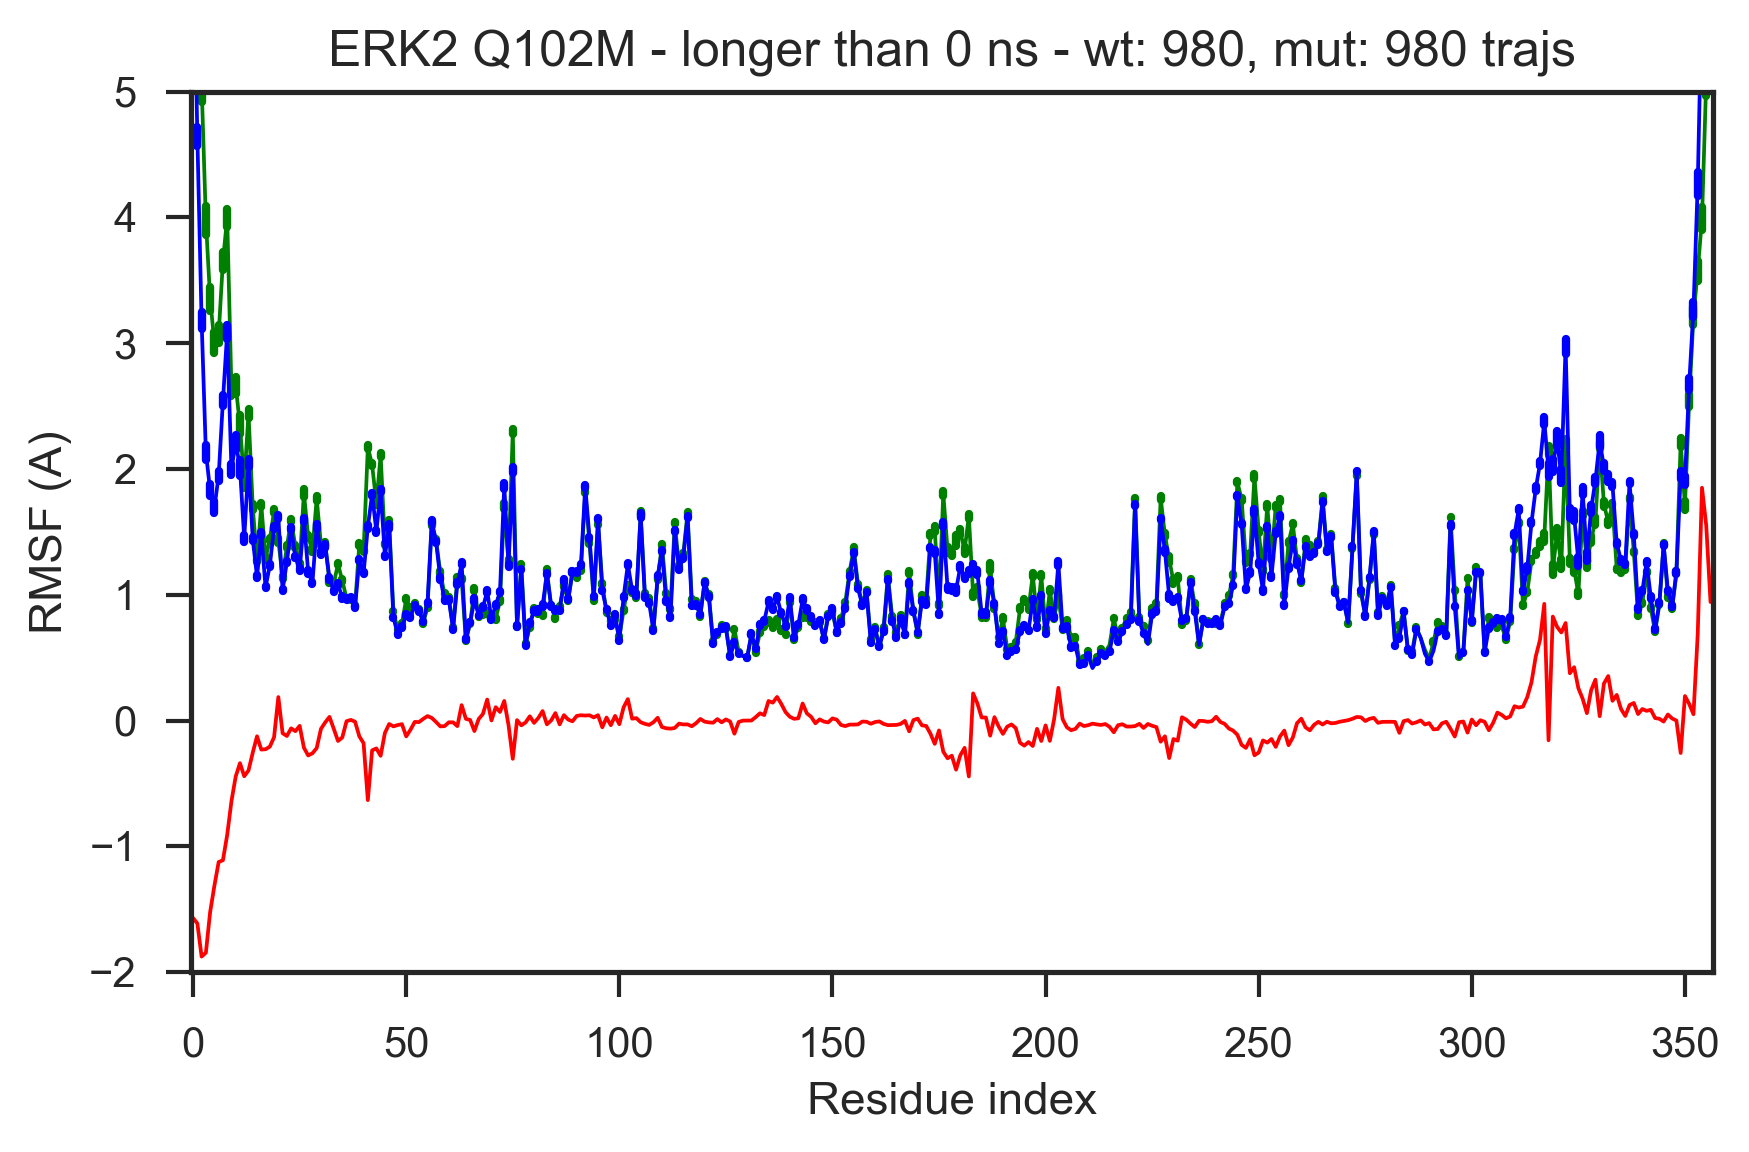

In [420]:
#for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
for k, cutoff in enumerate([0]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs4_res)[np.argwhere(np.array(traj_lengths[4]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            x1.append(j)
            y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.mean(b, axis=0)[0]-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK2 Q102M - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[4]) > cutoff))))
    plt.tight_layout()
    #plt.savefig('erk2_q102m_rmsf_pngs/%d.png' % k)
    plt.show()

In [408]:
# mkdir erk2_q102M_rmsf_pngs

In [419]:
for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
#for k, cutoff in enumerate([550]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs4_res)[np.argwhere(np.array(traj_lengths[4]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            x1.append(j)
            y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.mean(b, axis=0)[0]-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK2 Q102M - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[4]) > cutoff))))
    plt.tight_layout()
    plt.savefig('erk2_q102m_rmsf_pngs/%d.png' % k)
    plt.close()

In [422]:
im = mpy.ImageSequenceClip(sorted(glob('erk2_q102m_rmsf_pngs/*.png')), fps=1)

In [423]:
im.write_videofile('erk2_q102m.mp4')

[MoviePy] >>>> Building video erk2_q102m.mp4
[MoviePy] Writing video erk2_q102m.mp4


 89%|████████▉ | 8/9 [00:00<00:00, 12.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk2_q102m.mp4 



In [427]:
### ERK2 55N Q102M

In [429]:
rmsfs5 = np.load('rmsfs5.npy')
top = md.load('ERK2_55N_Q102M.pdb')
top = top.atom_slice(top.top.select('not element H'))

In [430]:
top

<mdtraj.Trajectory with 1 frames, 2906 atoms, 358 residues, without unitcells at 0x1a15caeba8>

In [431]:
rmsfs = rmsfs5
rmsfs5_res = []
rmsfs_res = rmsfs5_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [432]:
traj_lengths = np.load('traj_lengths.npy')
traj_lengths = traj_lengths[10:]

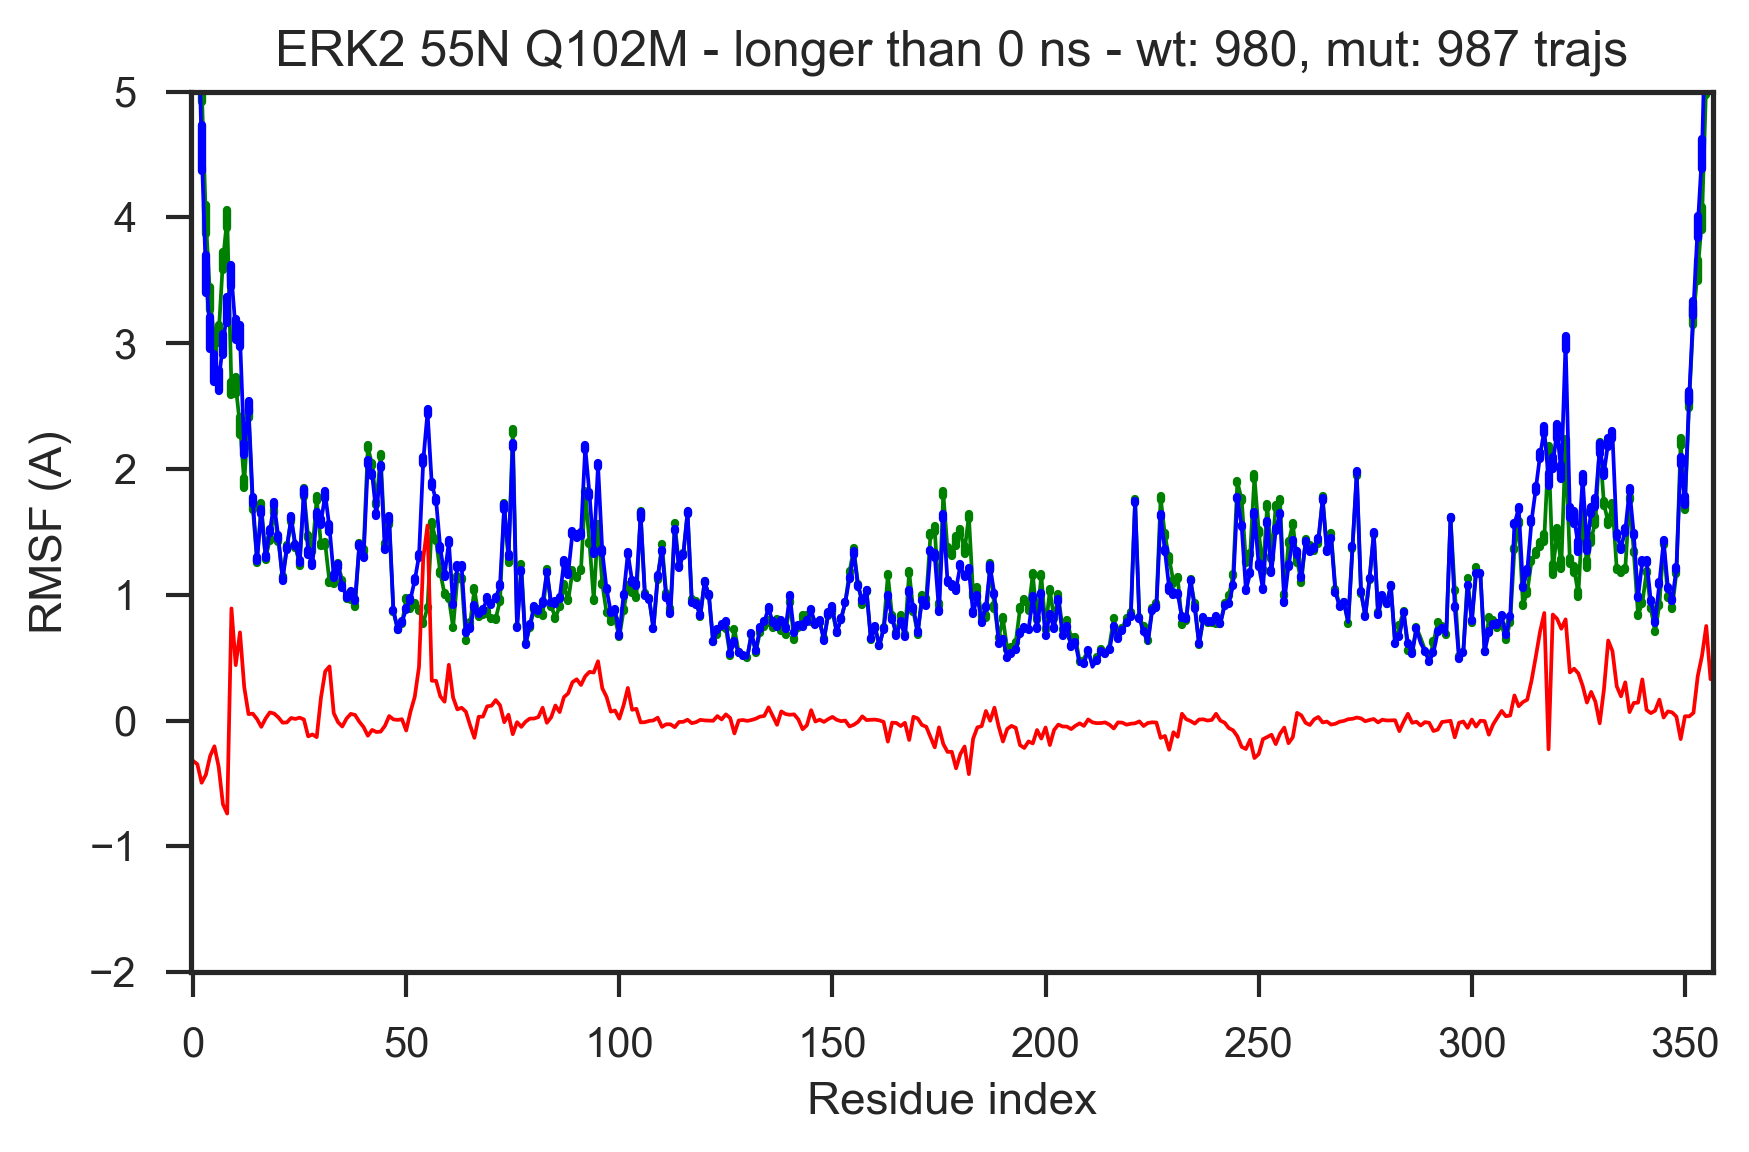

In [437]:
#for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
for k, cutoff in enumerate([0]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs5_res)[np.argwhere(np.array(traj_lengths[5]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 54:
                continue
            if j > 54:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][55:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK2 55N Q102M - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[5]) > cutoff))))
    plt.tight_layout()
    #plt.savefig('erk2_55n_q102m_rmsf_pngs/%d.png' % k)
    plt.show()

In [435]:
# mkdir erk2_55n_q102m_rmsf_pngs

In [436]:
for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
#for k, cutoff in enumerate([550]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs5_res)[np.argwhere(np.array(traj_lengths[5]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 54:
                continue
            if j > 54:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][55:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK2 55N Q102M - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[5]) > cutoff))))
    plt.tight_layout()
    plt.savefig('erk2_55n_q102m_rmsf_pngs/%d.png' % k)
    plt.close()

In [439]:
im = mpy.ImageSequenceClip(sorted(glob('erk2_55n_q102m_rmsf_pngs/*.png')), fps=1)

In [440]:
im.write_videofile('erk2_55n_q102m.mp4')

[MoviePy] >>>> Building video erk2_55n_q102m.mp4
[MoviePy] Writing video erk2_55n_q102m.mp4


 89%|████████▉ | 8/9 [00:00<00:00, 12.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk2_55n_q102m.mp4 



In [438]:
#### ok so we see in ERK1 that the activation loop signal picks up with longer trajectories only - 
# see if we get the same if we weight the trajectories by their length in the mean

In [677]:
# #for k, cutoff in enumerate([0,50,100,200,300,400,500, 600]):
# #for k, cutoff in enumerate([550]):
# for k, cutoff in enumerate([0]):
    
#     a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
#     b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

#     x0 = []
#     y0 = []

#     for i in range(len(a)):
#         for j in range(len(a[i][0])):
#             x0.append(j)
#             y0.append(a[i][0][j]*10)

#     x1 = []
#     y1 = []

#     for i in range(len(b)):
#         for j in range(len(b[i][0])):
#             if j == 51:
#                 continue
#             if j > 51:
#                 x1.append(j-1)
#                 y1.append(b[i][0][j]*10)
#             else:
#                 x1.append(j)
#                 y1.append(b[i][0][j]*10)            

#     plt.figure(dpi=300)
#     sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
#     sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
#     sns.pointplot(x=np.arange(352), y=(np.concatenate([np.average(b, axis=0, weights=traj_lengths[1])[0][:51], np.average(b, axis=0, weights=traj_lengths[1])[0][52:]])-np.average(a, axis=0, weights=traj_lengths[0])[0])*10, markers='', errwidth=2, color='red')
#     sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='yellow')
#     plt.ylim((-2,5))
#     plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
#     plt.xlabel('Residue index')
#     plt.ylabel('RMSF (A)')
#     plt.title('ERK1 74N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
#     plt.tight_layout()
#     #plt.savefig('erk1_rmsf_pngs/%d.png' % k)
#     plt.show()

In [466]:
# no significant effect! - ok report these as is - looks like we want to wait for longer trajectories

In [540]:
# new realization - maybe discarding beginnings of trajectories will help, in addition to a distance threshold
# going to have to recompute the rmsfs on lilac then

In [471]:
# now look at the distances used in the paper

In [472]:
# in ERK1 look at E88 - K71, in ERK2 at E69 - K52

In [473]:
# translated to 0-indexes:

# ERK1 WT: E64 - K47
# ERK1 74N: E65 - K47
# ERK2 WT: E67 - K50
# ERK2 55N: E68 - K50
# ERK2 Q102M: E67 - K50
# ERK2 55N Q102M: E68 - K50

In [474]:
# ok going to calculate these on lilac

In [499]:
# distances0 = np.load('distances0.npy')

In [500]:
# dist0_concat = np.concatenate([distances0[i][0] for i in range(len(distances0))])

In [501]:
# plt.figure(dpi=100)
# sns.distplot(dist0_concat)

In [495]:
# so turns out they used C-alpha distances! let's redo with those

In [ ]:
### ERK1

In [504]:
distances0 = np.load('distances0.npy')
dist0_concat = np.concatenate([distances0[i][0] for i in range(len(distances0))])

In [517]:
distances1 = np.load('distances1.npy')
dist1_concat = np.concatenate([distances1[i][0] for i in range(len(distances1))])

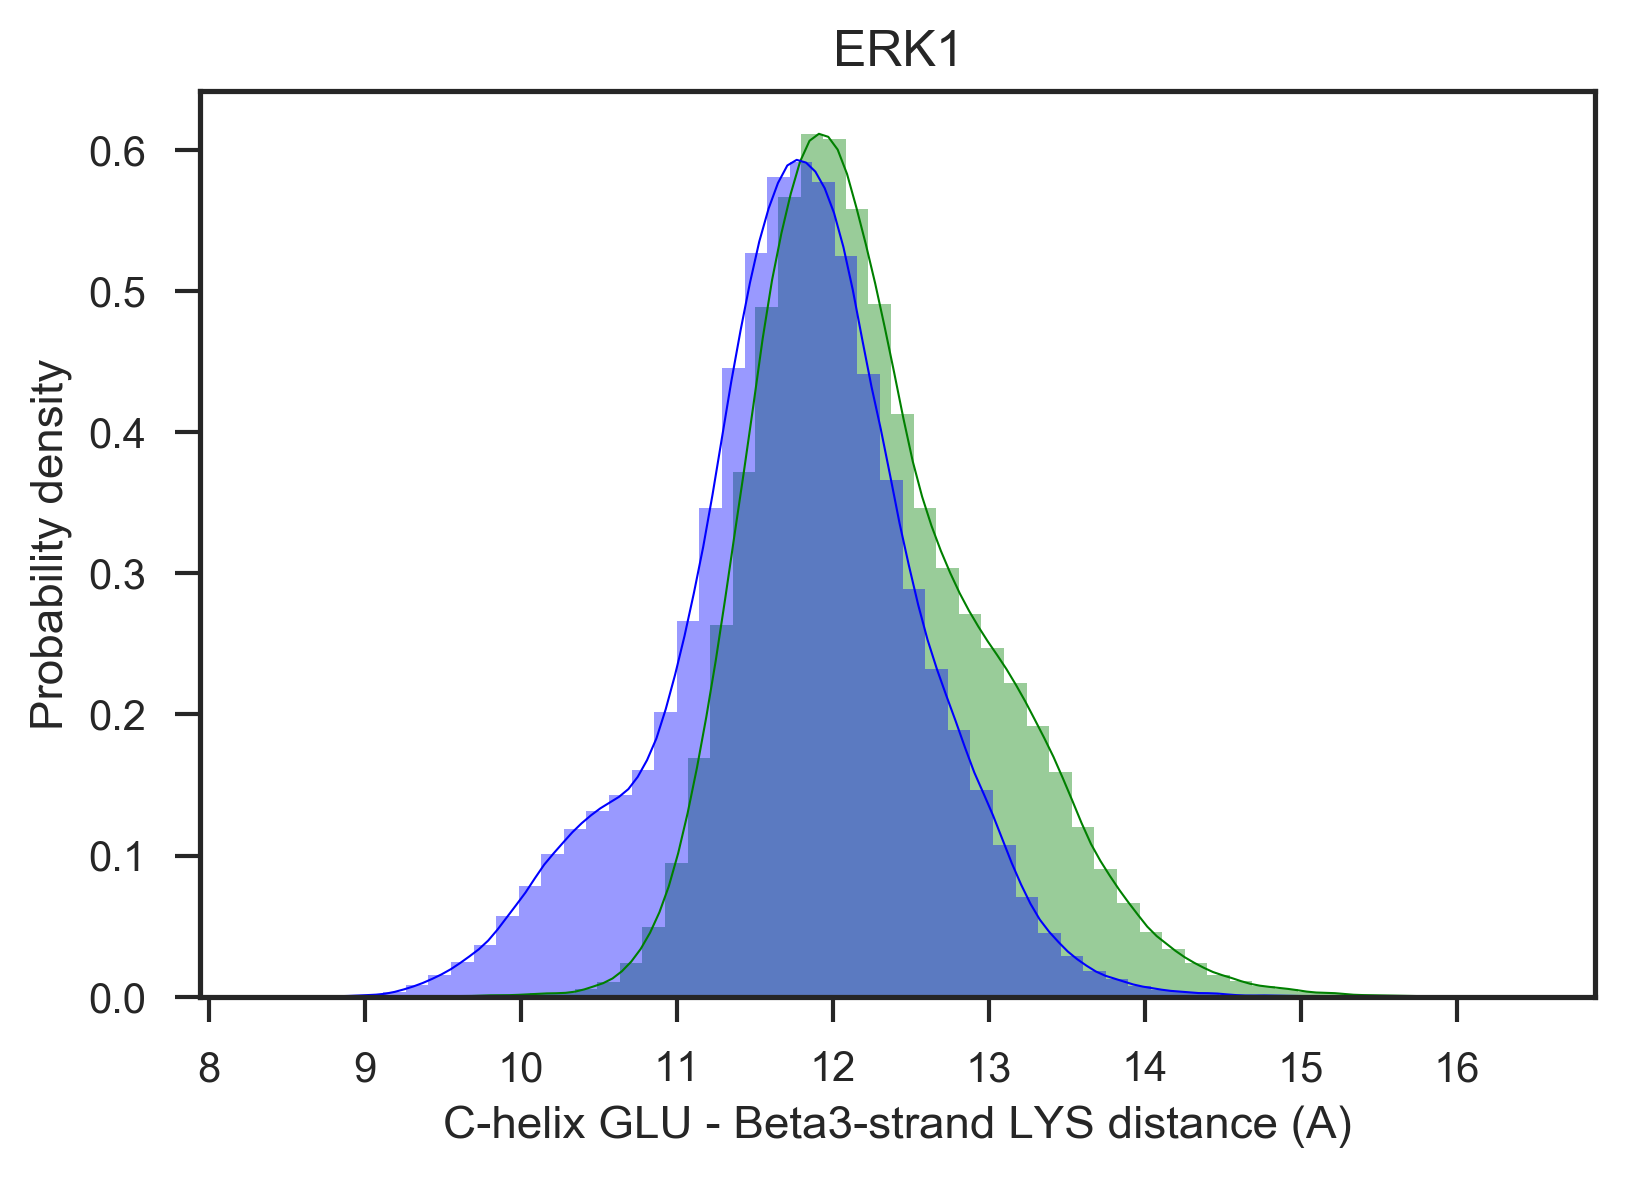

In [518]:
plt.figure(dpi=300)
sns.distplot(dist0_concat*10, color='green')
sns.distplot(dist1_concat*10, color='blue')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.title('ERK1')
plt.show()

In [519]:
## ERK2

In [531]:
distances2 = np.load('distances2.npy')
dist2_concat = np.concatenate([distances2[i][0] for i in range(len(distances2))])

distances3 = np.load('distances3.npy')
dist3_concat = np.concatenate([distances3[i][0] for i in range(len(distances3))])

distances4 = np.load('distances4.npy')
dist4_concat = np.concatenate([distances4[i][0] for i in range(len(distances4))])

distances5 = np.load('distances5.npy')
dist5_concat = np.concatenate([distances5[i][0] for i in range(len(distances5))])

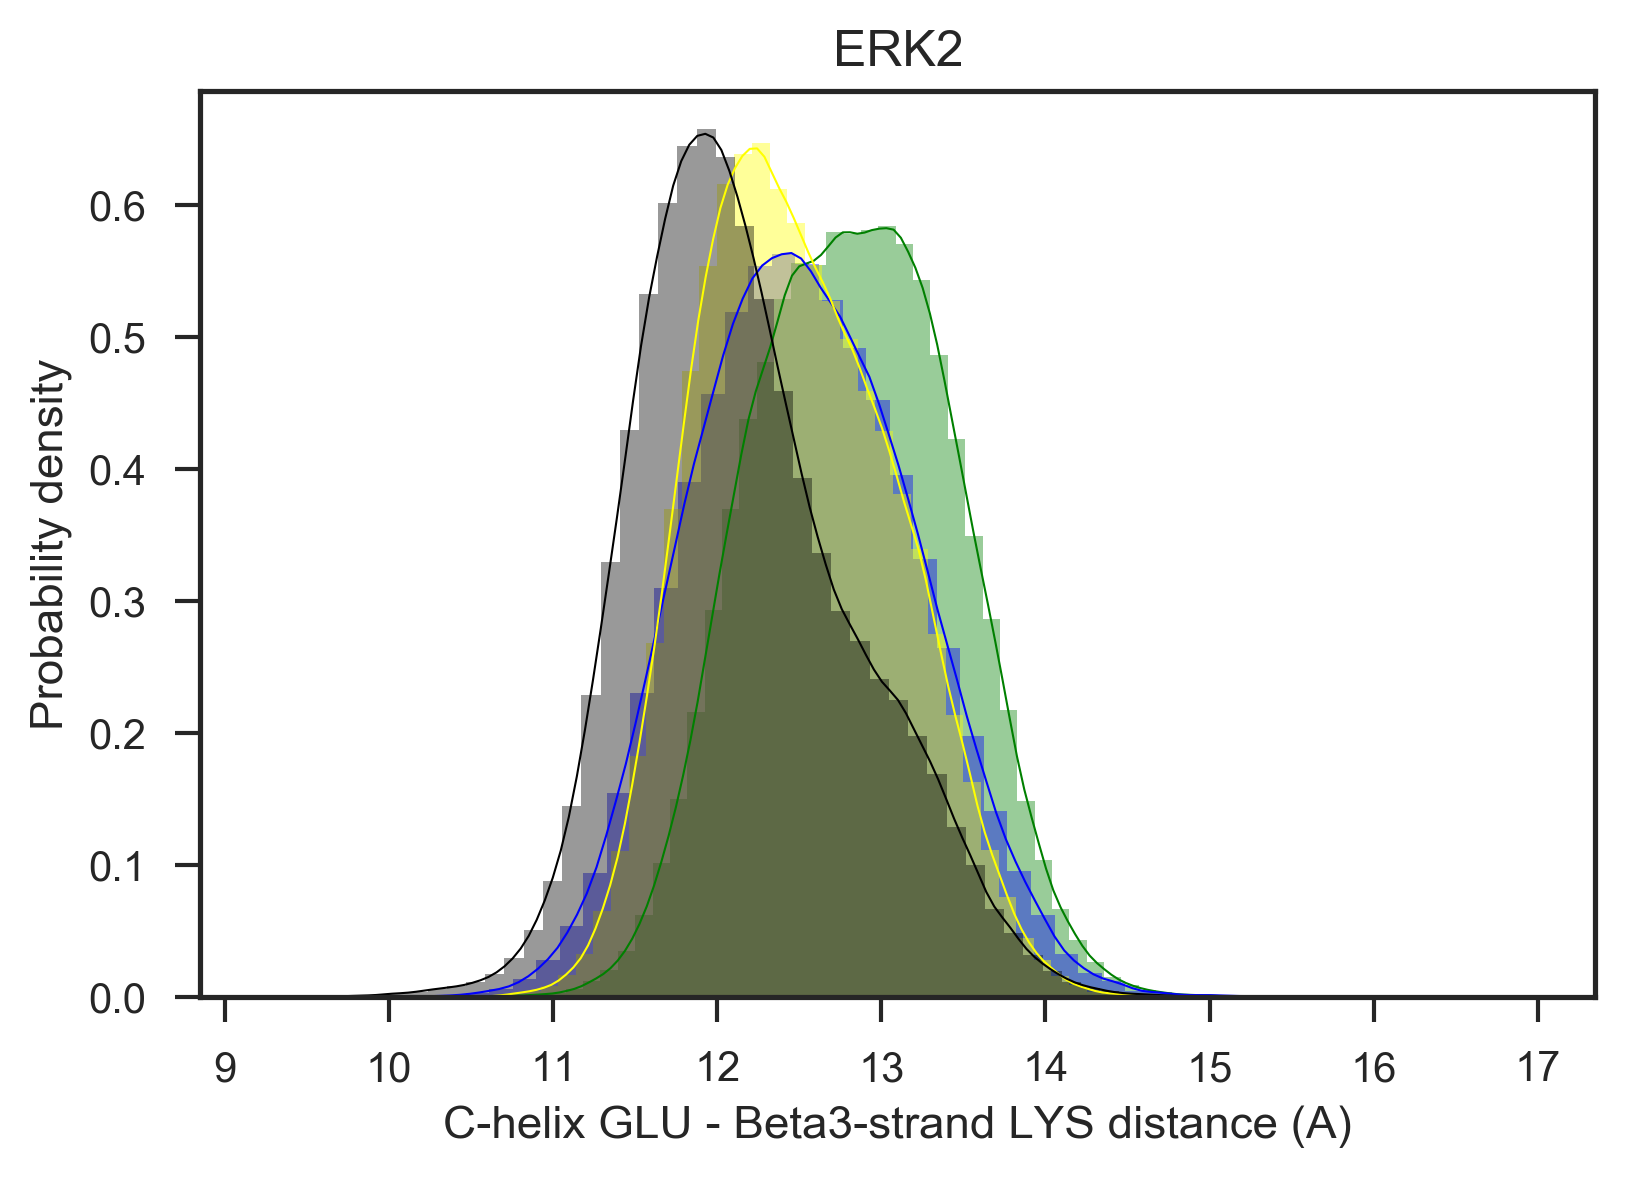

In [532]:
plt.figure(dpi=300)
sns.distplot(dist2_concat*10, color='green')
sns.distplot(dist3_concat*10, color='blue')
sns.distplot(dist4_concat*10, color='yellow')
sns.distplot(dist5_concat*10, color='black')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.title('ERK2')
plt.show()

In [541]:
# let's see what happens if I include only frames above a certain trajectory time

In [562]:
cutoff = 500   # in frames

distances2 = np.load('distances2.npy')
dist2_concat = np.concatenate([distances2[i][0][cutoff:] for i in range(len(distances2))])

distances3 = np.load('distances3.npy')
dist3_concat = np.concatenate([distances3[i][0][cutoff:] for i in range(len(distances3))])

distances4 = np.load('distances4.npy')
dist4_concat = np.concatenate([distances4[i][0][cutoff:] for i in range(len(distances4))])

distances5 = np.load('distances5.npy')
dist5_concat = np.concatenate([distances5[i][0][cutoff:] for i in range(len(distances5))])

In [678]:
# plt.figure(dpi=300)
# sns.distplot(dist2_concat*10, color='green')
# sns.distplot(dist3_concat*10, color='blue')
# sns.distplot(dist4_concat*10, color='yellow')
# sns.distplot(dist5_concat*10, color='black')
# plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
# plt.ylabel('Probability density')
# plt.xlim((9,16))
# plt.title('ERK2')
# plt.show()

In [565]:
# ok so there are differences - let's make these in a movie

In [567]:
# mkdir erk2_dist_pngs

In [585]:
# for k,cutoff in enumerate([0,50,100,200,300,400,500]):

#     distances2 = np.load('distances2.npy')
#     dist2_concat = np.concatenate([distances2[i][0][cutoff:] for i in range(len(distances2))])

#     distances3 = np.load('distances3.npy')
#     dist3_concat = np.concatenate([distances3[i][0][cutoff:] for i in range(len(distances3))])

#     distances4 = np.load('distances4.npy')
#     dist4_concat = np.concatenate([distances4[i][0][cutoff:] for i in range(len(distances4))])

#     distances5 = np.load('distances5.npy')
#     dist5_concat = np.concatenate([distances5[i][0][cutoff:] for i in range(len(distances5))])

#     plt.figure(dpi=300)
#     sns.distplot(dist2_concat*10, color='green')
#     sns.distplot(dist3_concat*10, color='blue')
#     sns.distplot(dist4_concat*10, color='yellow')
#     sns.distplot(dist5_concat*10, color='black')
#     plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
#     plt.ylabel('Probability density')
#     plt.title('ERK2 - longer than %d ns - frames: %d, %d, %d, %d' % ((cutoff/2), len(dist2_concat), len(dist3_concat), len(dist4_concat), len(dist5_concat)))
#     plt.xlim((9,16))
#     plt.tight_layout()
#     plt.savefig('erk2_dist_pngs2/%d.png' % k)
#     plt.close()

In [587]:
for k,cutoff in enumerate([0,50,100,200,300,400,500]):

    distances2 = np.load('distances2.npy')
    dist2_concat = np.concatenate([distances2[i][0][cutoff:] for i in range(len(distances2))])

    distances3 = np.load('distances3.npy')
    dist3_concat = np.concatenate([distances3[i][0][cutoff:] for i in range(len(distances3))])

    distances4 = np.load('distances4.npy')
    dist4_concat = np.concatenate([distances4[i][0][cutoff:] for i in range(len(distances4))])

    distances5 = np.load('distances5.npy')
    dist5_concat = np.concatenate([distances5[i][0][cutoff:] for i in range(len(distances5))])

    plt.figure(dpi=300)
    sns.distplot(dist2_concat*10, color='green')
    sns.distplot(dist3_concat*10, color='blue')
    sns.distplot(dist4_concat*10, color='yellow')
    sns.distplot(dist5_concat*10, color='black')
    plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
    plt.ylabel('Probability density')
    plt.title('ERK2 - longer than %d ns' % (cutoff/2))
    plt.xlim((9,16))
    plt.tight_layout()
    plt.savefig('erk2_dist_pngs/%d.png' % k)
    plt.close()

In [588]:
im = mpy.ImageSequenceClip(glob('erk2_dist_pngs/*.png'), fps=1)
im.write_videofile('erk2_dist.mp4')

[MoviePy] >>>> Building video erk2_dist.mp4
[MoviePy] Writing video erk2_dist.mp4


 88%|████████▊ | 7/8 [00:00<00:00, 11.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk2_dist.mp4 



In [ ]:
# ok we got this

In [589]:
# now I don't like these CA distances - don't know if there's a contact or no! let's also calculate closest heavy atoms

In [590]:
### ERK1

In [591]:
distances0 = np.load('distances0_heavy.npy')
dist0_concat = np.concatenate([distances0[i][0] for i in range(len(distances0))])

In [592]:
distances1 = np.load('distances1_heavy.npy')
dist1_concat = np.concatenate([distances1[i][0] for i in range(len(distances1))])

In [597]:
sns.set_context('notebook')

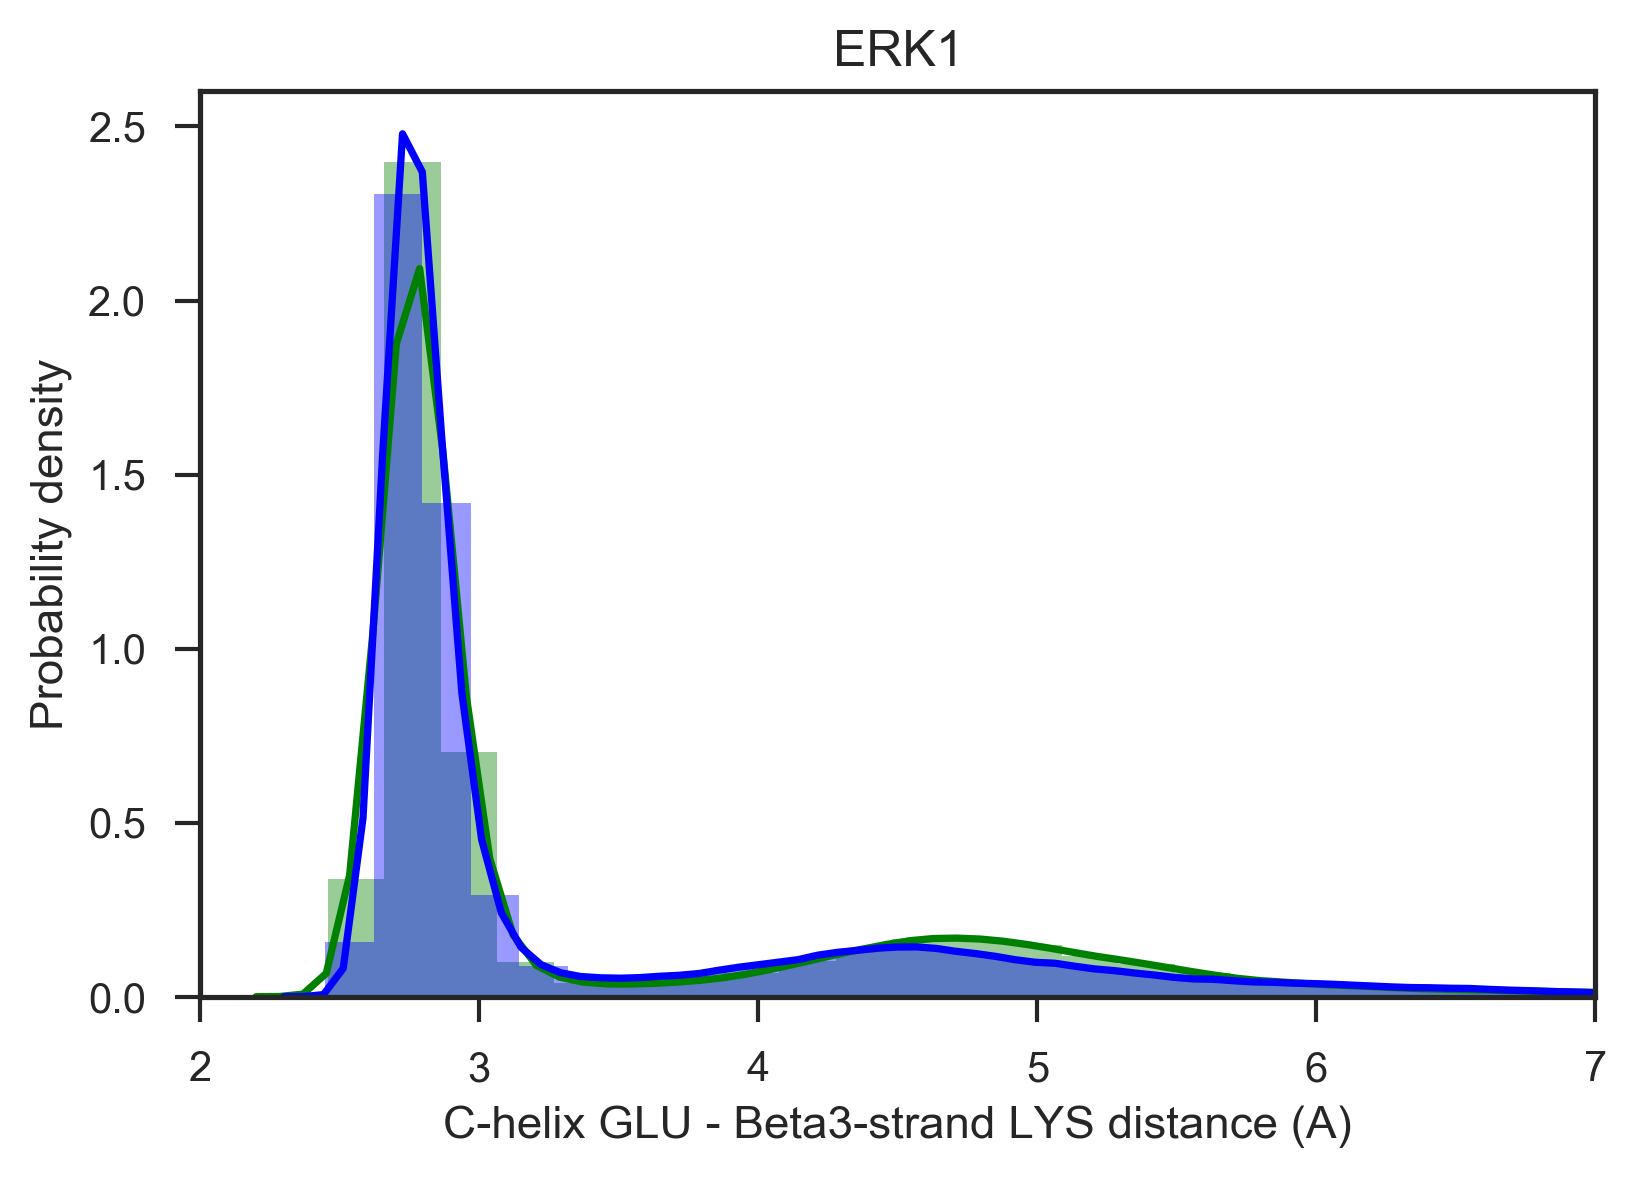

In [598]:
plt.figure(dpi=300)
sns.distplot(dist0_concat*10, color='green')
sns.distplot(dist1_concat*10, color='blue')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK1')
plt.show()

In [599]:
### ERK2

In [600]:
distances2 = np.load('distances2_heavy.npy')
dist2_concat = np.concatenate([distances2[i][0] for i in range(len(distances2))])

distances3 = np.load('distances3_heavy.npy')
dist3_concat = np.concatenate([distances3[i][0] for i in range(len(distances3))])

distances4 = np.load('distances4_heavy.npy')
dist4_concat = np.concatenate([distances4[i][0] for i in range(len(distances4))])

distances5 = np.load('distances5_heavy.npy')
dist5_concat = np.concatenate([distances5[i][0] for i in range(len(distances5))])

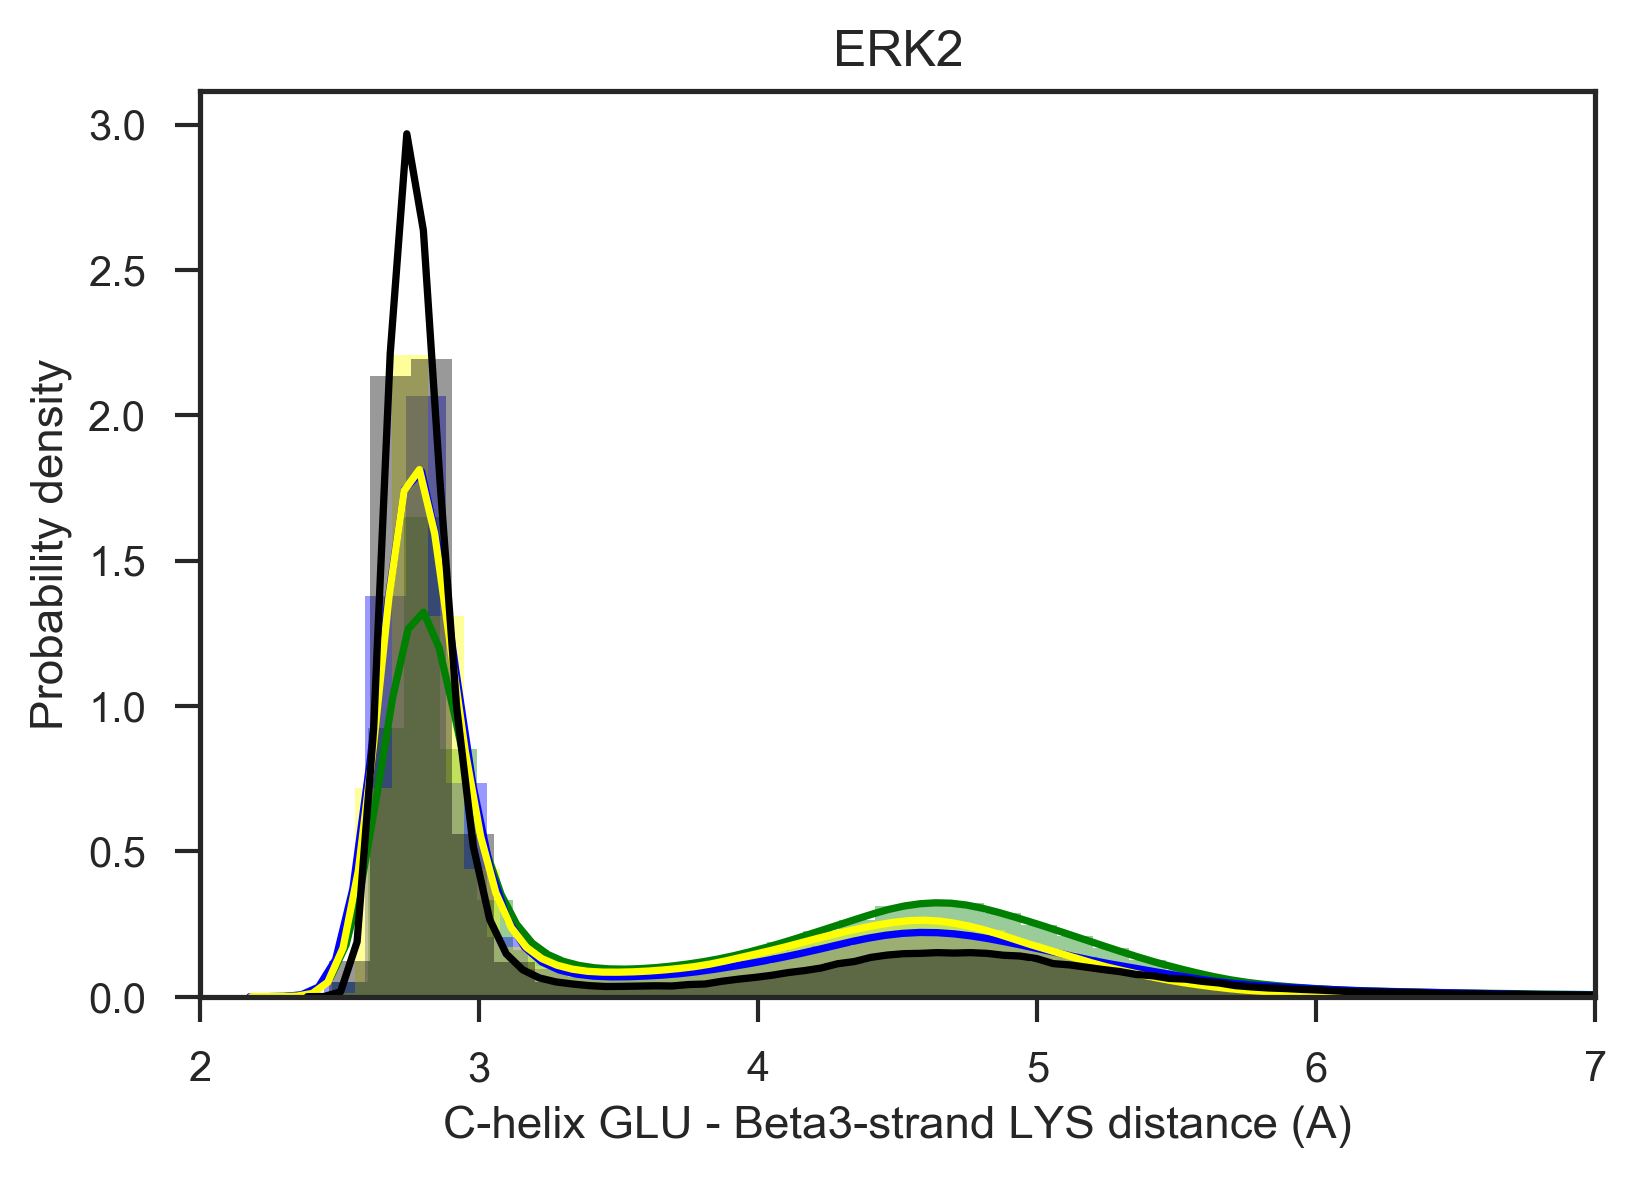

In [607]:
plt.figure(dpi=300)
sns.distplot(dist2_concat*10, color='green')
sns.distplot(dist3_concat*10, color='blue')
sns.distplot(dist4_concat*10, color='yellow')
sns.distplot(dist5_concat*10, color='black')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2')
plt.show()

In [608]:
# let's do the only-frames-over-thershold for this style

In [612]:
# mkdir erk2_dist_heavy_pngs

In [613]:
for k,cutoff in enumerate([0,50,100,200,300,400,500]):

    distances2 = np.load('distances2_heavy.npy')
    dist2_concat = np.concatenate([distances2[i][0][cutoff:] for i in range(len(distances2))])

    distances3 = np.load('distances3_heavy.npy')
    dist3_concat = np.concatenate([distances3[i][0][cutoff:] for i in range(len(distances3))])

    distances4 = np.load('distances4_heavy.npy')
    dist4_concat = np.concatenate([distances4[i][0][cutoff:] for i in range(len(distances4))])

    distances5 = np.load('distances5_heavy.npy')
    dist5_concat = np.concatenate([distances5[i][0][cutoff:] for i in range(len(distances5))])

    plt.figure(dpi=300)
    sns.distplot(dist2_concat*10, color='green')
    sns.distplot(dist3_concat*10, color='blue')
    sns.distplot(dist4_concat*10, color='yellow')
    sns.distplot(dist5_concat*10, color='black')
    plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
    plt.ylabel('Probability density')
    plt.title('ERK2 - longer than %d ns' % (cutoff/2))
    plt.xlim((2,7))
    plt.tight_layout()
    plt.savefig('erk2_dist_heavy_pngs/%d.png' % k)
    plt.close()

In [614]:
im = mpy.ImageSequenceClip(glob('erk2_dist_heavy_pngs/*.png'), fps=1)
im.write_videofile('erk2_dist_heavy.mp4')

[MoviePy] >>>> Building video erk2_dist_heavy.mp4
[MoviePy] Writing video erk2_dist_heavy.mp4


 88%|████████▊ | 7/8 [00:00<00:00, 11.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk2_dist_heavy.mp4 



In [617]:
# ok great - now coming back to this thought:
# new realization - maybe discarding beginnings of trajectories will help, in addition to a distance threshold
# going to have to recompute the rmsfs on lilac then

In [618]:
# doing this only for ERK1

In [619]:
# another realization - they might have done C-alpha RMSF - let's do that too - so 2 things remaining here

In [661]:
# note these two will be with the UPDATED DATASET (another ~ 25-30G (x2 lilac count))

In [676]:
# ok back with discarding first 25 ns (50 frames) - let's do a movie

In [679]:
#### DISCARDING FIRST 25 NS OF TRAJECTORIES

In [ ]:
# mkdir erk1_rmsfs_pngs_cutstart

In [700]:
sns.set_context("notebook", rc={"lines.linewidth": 0.5})

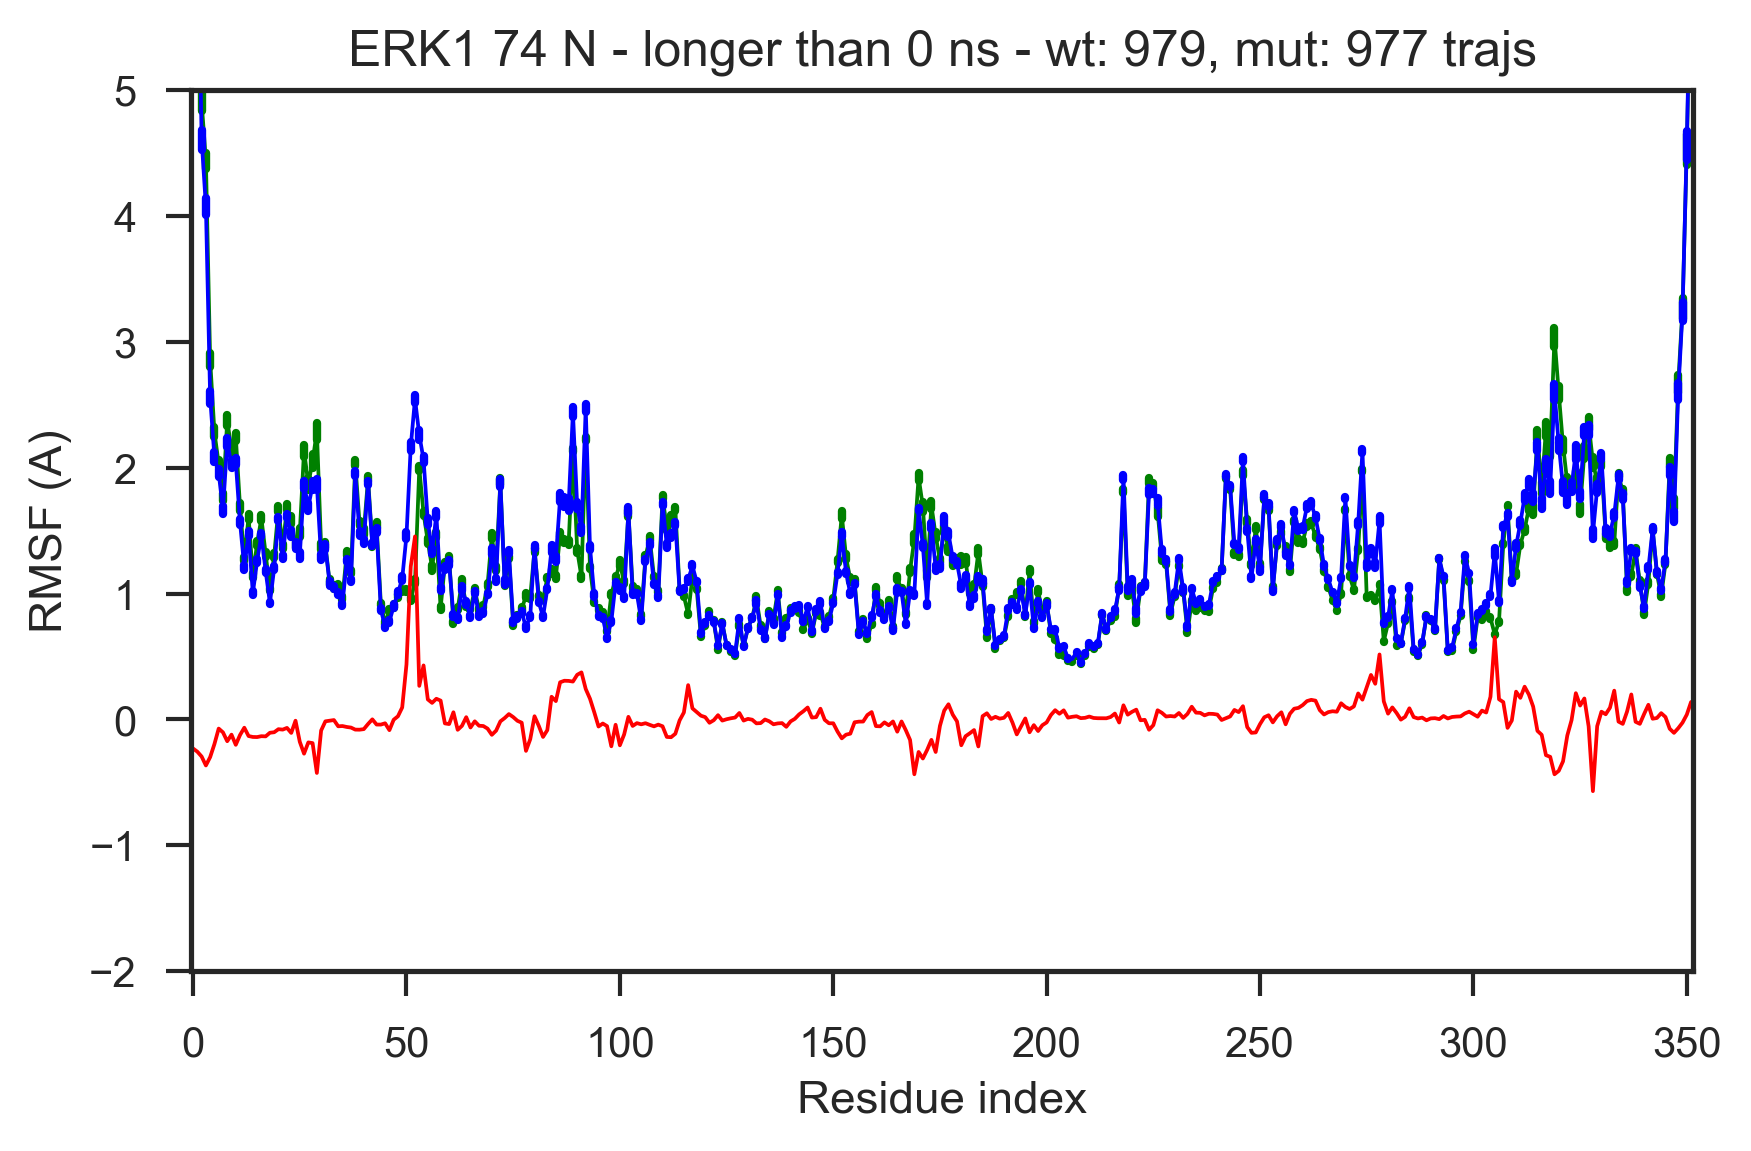

In [725]:
rmsfs0 = np.load('rmsfs0_cutstart50.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('not element H'))

rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
rmsfs1 = np.load('rmsfs1_cutstart50.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('not element H')) 

rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
traj_lengths = np.load('traj_lengths_newoct31.npy')

#for k, cutoff in enumerate([0,50,100,200,300,400,500,600,700]):
for k, cutoff in enumerate([0]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK1 74 N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.tight_layout()
    #plt.savefig('erk1_rmsfs_pngs_cutstart/%d.png' % k)
    plt.show()

In [711]:
rmsfs0 = np.load('rmsfs0_cutstart50.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('not element H'))

rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
rmsfs1 = np.load('rmsfs1_cutstart50.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('not element H')) 

rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
traj_lengths = np.load('traj_lengths_newoct31.npy')

for k, cutoff in enumerate([0,50,100,200,300,400,500,600,700]):
#for k, cutoff in enumerate([550]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK1 74 N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.tight_layout()
    plt.savefig('erk1_rmsfs_pngs_cutstart/%d.png' % k)
    plt.close()

In [712]:
im = mpy.ImageSequenceClip(glob('erk1_rmsfs_pngs_cutstart/*.png'), fps=1)
im.write_videofile('erk1_rmsfs_cutstart.mp4')

[MoviePy] >>>> Building video erk1_rmsfs_cutstart.mp4
[MoviePy] Writing video erk1_rmsfs_cutstart.mp4


 90%|█████████ | 9/10 [00:00<00:00, 11.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk1_rmsfs_cutstart.mp4 



In [ ]:
# this is surprising - we no longer get the long trajectory features! 

In [698]:
# now Calphas only (and also removing starts of trajs)

In [699]:
# mkdir erk1_rmsfs_pngs_cutstart_caonly

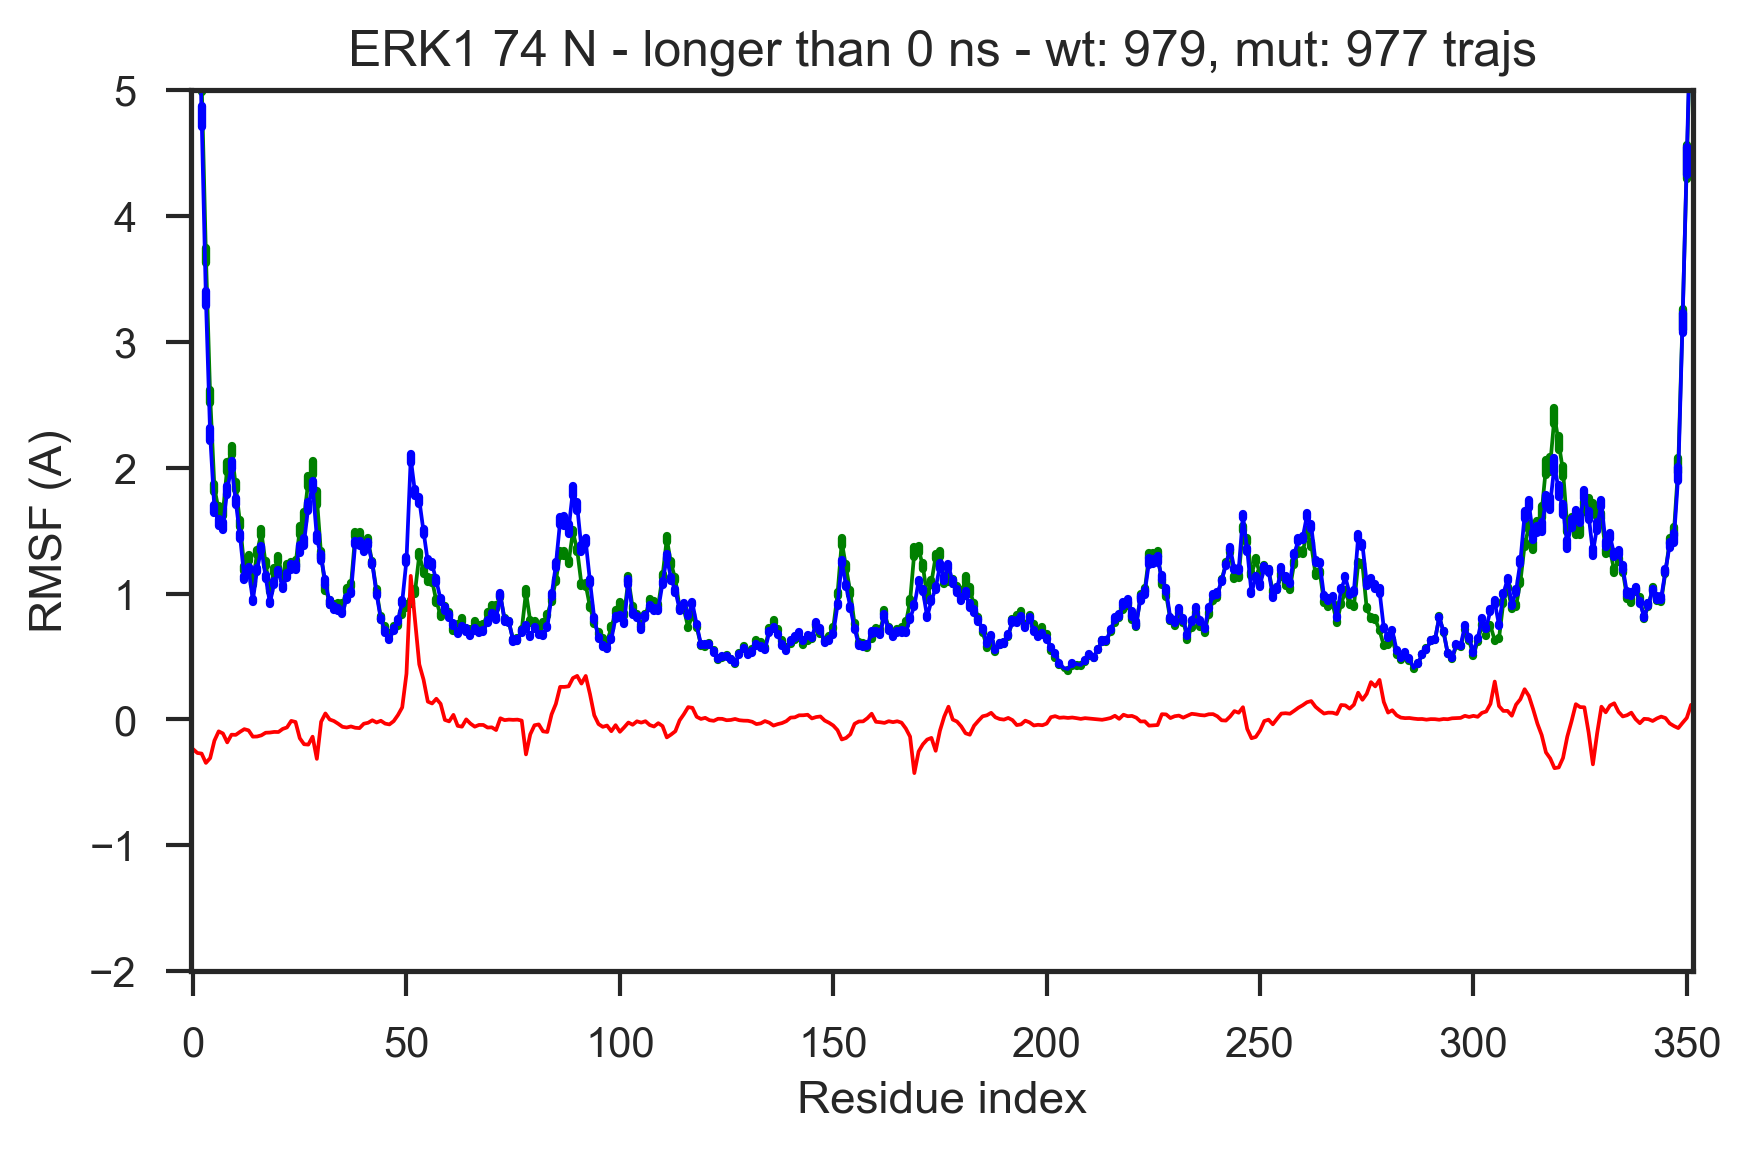

In [726]:
rmsfs0 = np.load('rmsfs0_cutstart_onlyca.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('name CA'))

rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
rmsfs1 = np.load('rmsfs1_cutstart_onlyca.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('name CA')) 

rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
traj_lengths = np.load('traj_lengths_newoct31.npy')

#for k, cutoff in enumerate([0,50,100,200,300,400,500,600,700]):
for k, cutoff in enumerate([0]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK1 74 N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.tight_layout()
    #plt.savefig('erk1_rmsfs_pngs_cutstart_caonly/%d.png' % k)
    plt.show()

In [722]:
rmsfs0 = np.load('rmsfs0_cutstart_onlyca.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('name CA'))

rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
rmsfs1 = np.load('rmsfs1_cutstart_onlyca.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('name CA')) 

rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)
    
traj_lengths = np.load('traj_lengths_newoct31.npy')

for k, cutoff in enumerate([0,50,100,200,300,400,500,600,700]):
#for k, cutoff in enumerate([550]):
#for k, cutoff in enumerate([0,50,100,200,300,400,500]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    plt.title('ERK1 74 N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.tight_layout()
    plt.savefig('erk1_rmsfs_pngs_cutstart_caonly/%d.png' % k)
    plt.close()

In [723]:
im = mpy.ImageSequenceClip(glob('erk1_rmsfs_pngs_cutstart_caonly/*.png'), fps=1)
im.write_videofile('erk1_rmsfs_cutstart_caonly.mp4')

[MoviePy] >>>> Building video erk1_rmsfs_cutstart_caonly.mp4
[MoviePy] Writing video erk1_rmsfs_cutstart_caonly.mp4


 90%|█████████ | 9/10 [00:00<00:00, 11.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: erk1_rmsfs_cutstart_caonly.mp4 



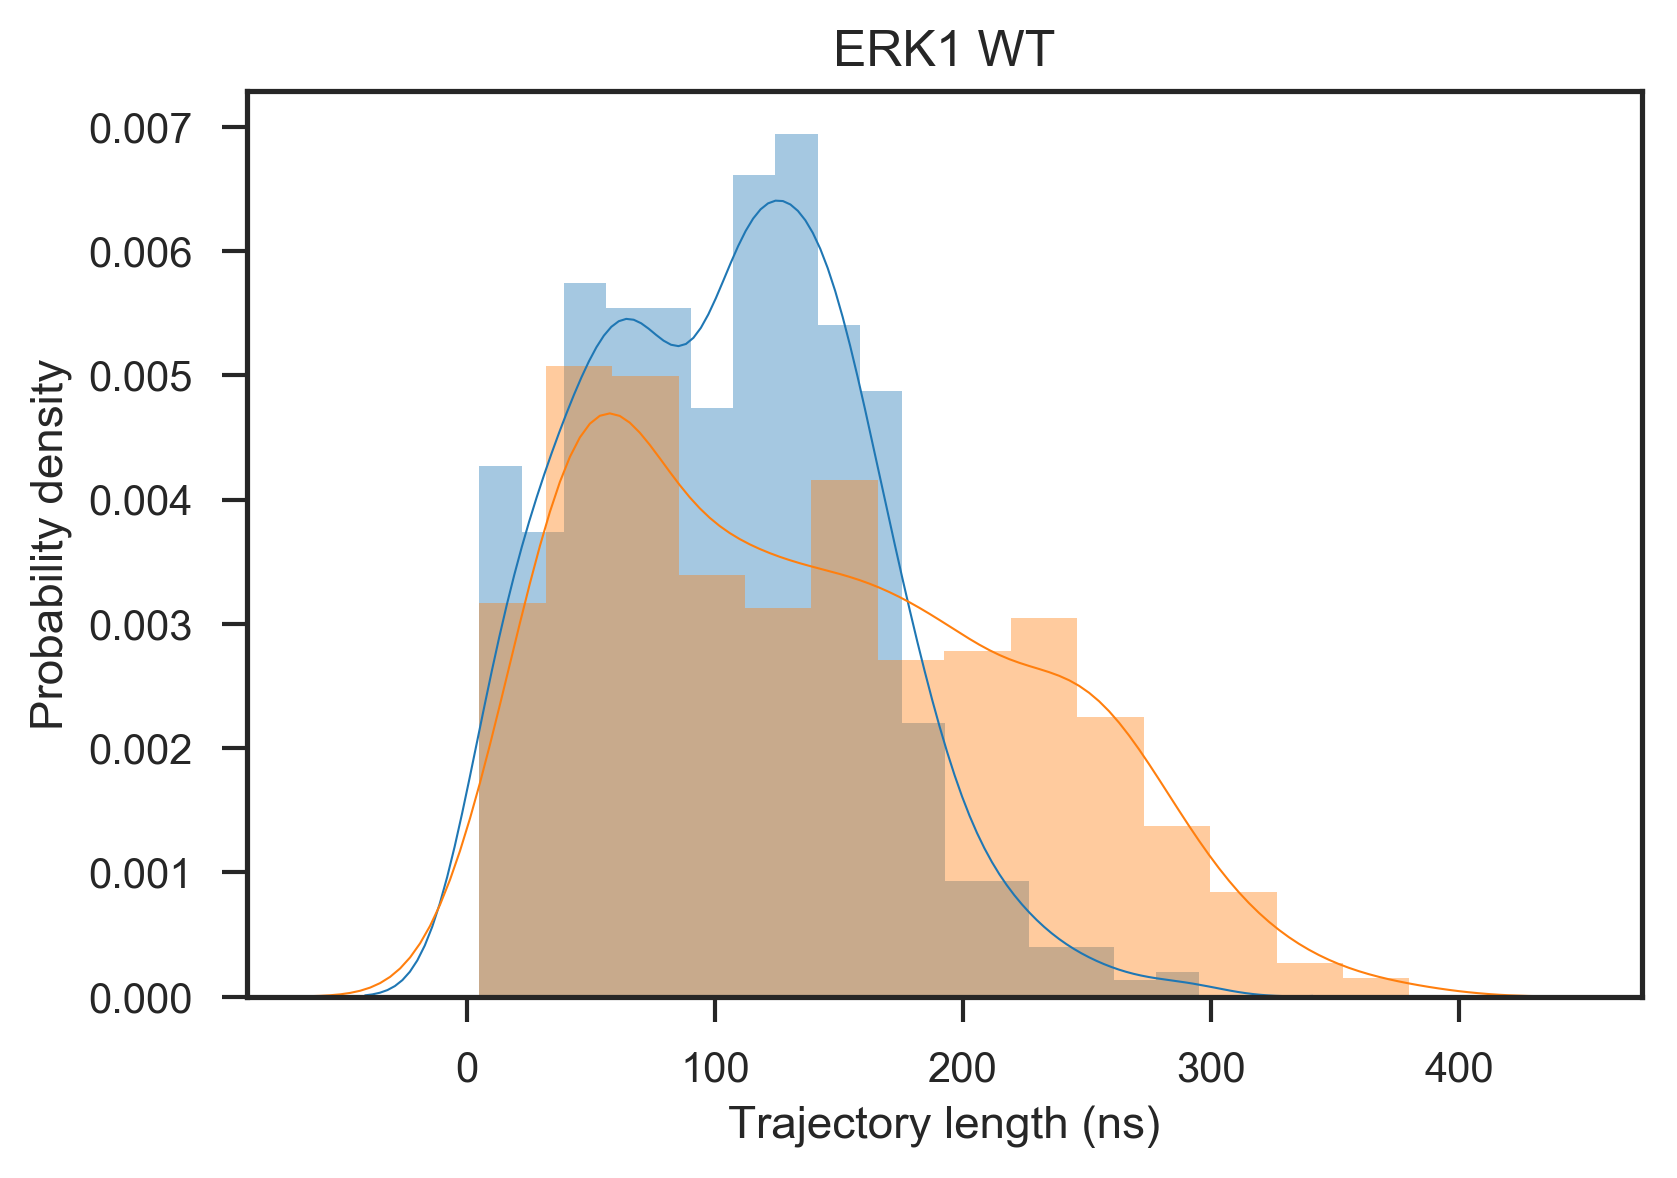

In [719]:
traj_lengths = np.load('traj_lengths_newoct31.npy')
traj_lengths2 = np.load('traj_lengths.npy')[10:]
traj_lengths2_ = []
for length in traj_lengths2[0]:
    if length > 50:
        traj_lengths2_.append(length-50)       
plt.figure(dpi=300)
sns.distplot(np.array(traj_lengths2_)/2)
sns.distplot(np.array(traj_lengths[0])/2)
plt.xlabel('Trajectory length (ns)')
plt.ylabel('Probability density')
plt.title('ERK1 WT')
plt.show()

In [724]:
# idea for future - rather than doing RMSFs using only trajectories over certain length, for each trajectory ONLY 
# INCLUDE FRAMES ABOVE CERTAIN LENGTH - so will have to do a loop over rmsf calculations with different cutoffs